In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("aligned_stock_data.csv")

In [3]:
df.head()

Date Symbol      Open      High       Low     Close     Volume
0  1998-01-08   AAPL  0.131018  0.139940  0.127261  0.136652  774020800
1  1998-01-09   AAPL  0.136183  0.145575  0.131487  0.136652  886547200
2  1998-01-12   AAPL  0.131017  0.139940  0.128670  0.137122  516398400
3  1998-01-13   AAPL  0.139940  0.147453  0.139001  0.146514  636854400
4  1998-01-14   AAPL  0.149331  0.149801  0.144636  0.148392  589265600

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307984 entries, 0 to 307983
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    307984 non-null  object 
 1   Symbol  307984 non-null  object 
 2   Open    307984 non-null  float64
 3   High    307984 non-null  float64
 4   Low     307984 non-null  float64
 5   Close   307984 non-null  float64
 6   Volume  307984 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 16.4+ MB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.shape

(307984, 7)

In [7]:
stocks = df['Symbol'].unique()

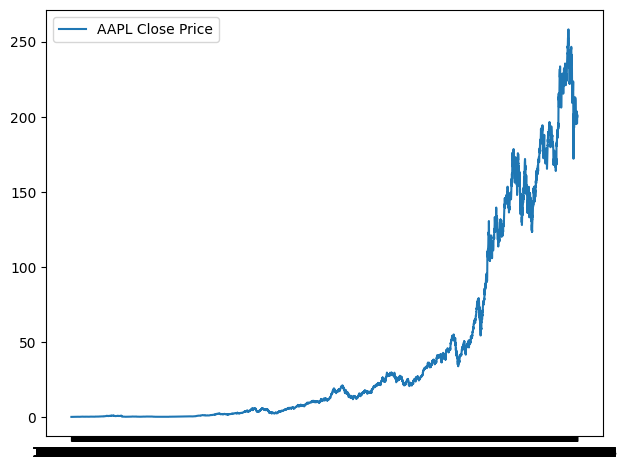

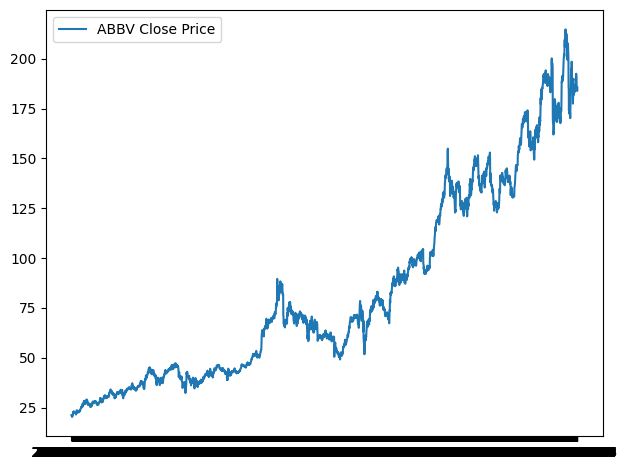

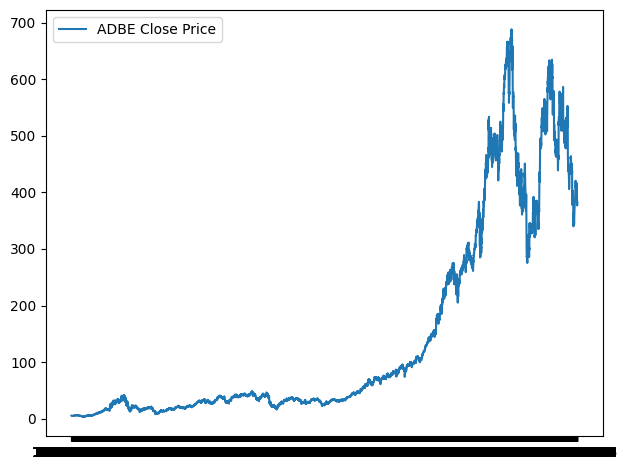

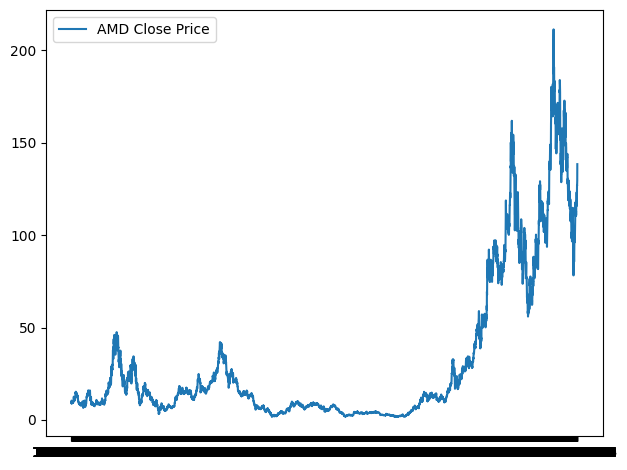

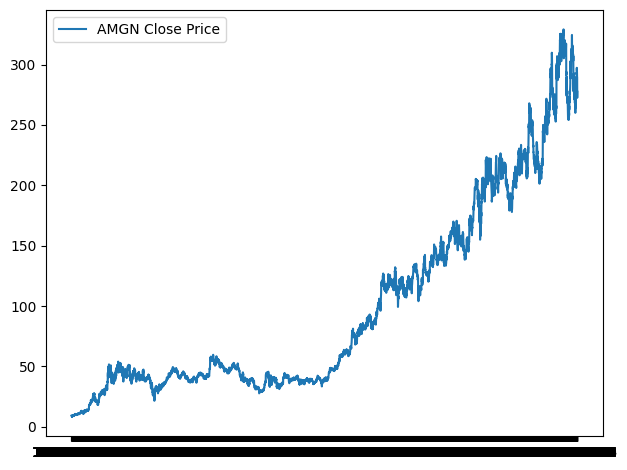

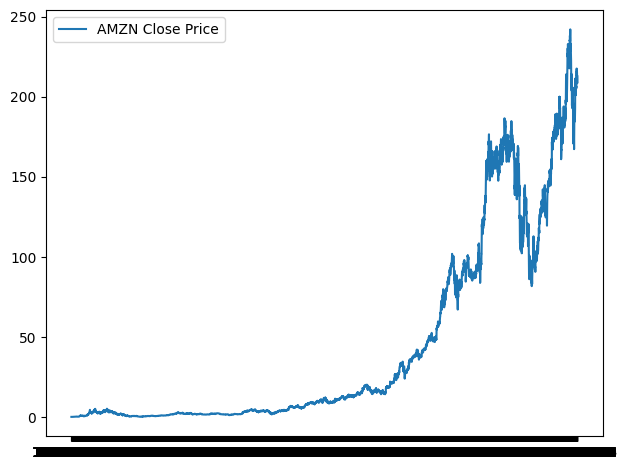

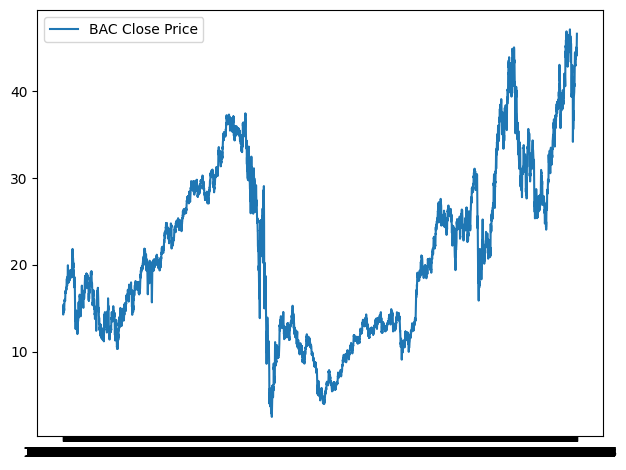

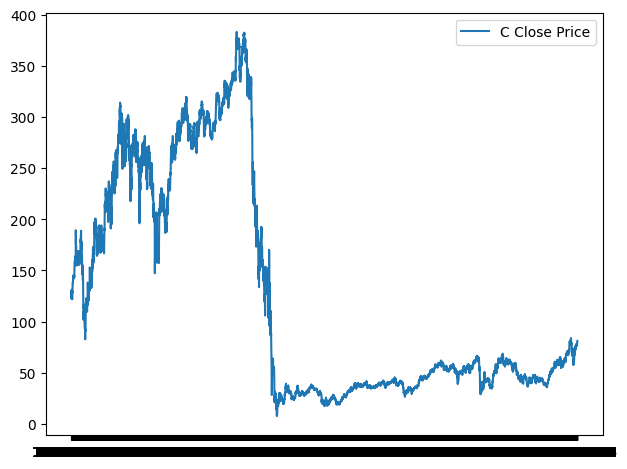

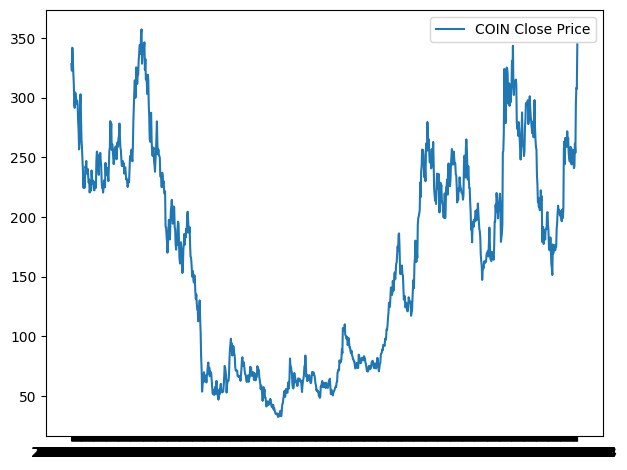

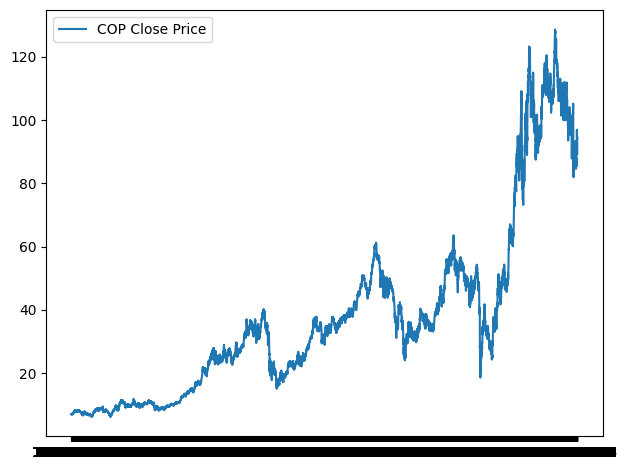

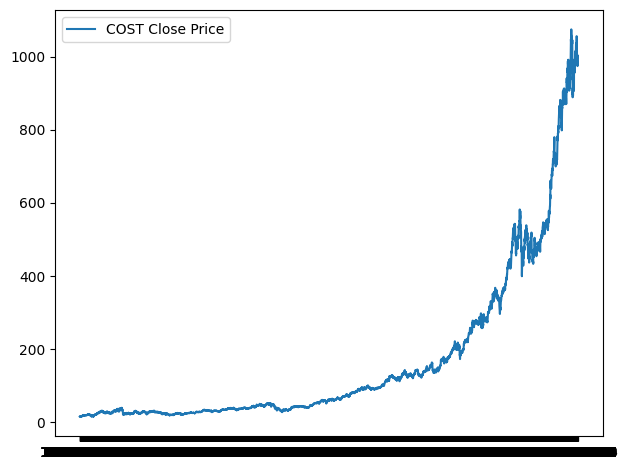

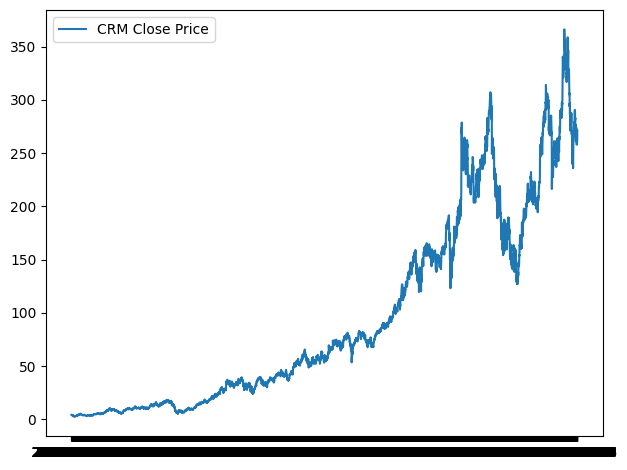

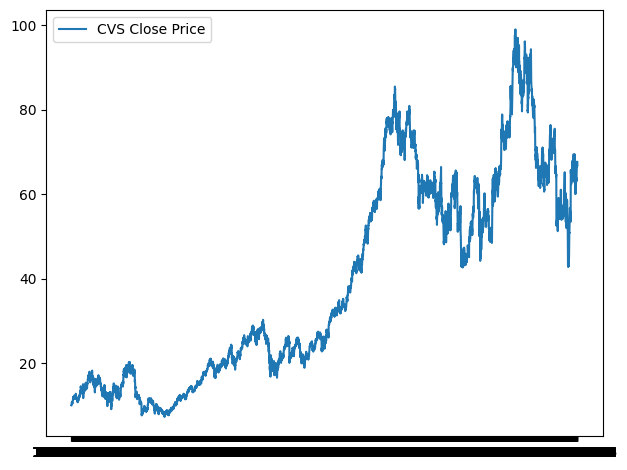

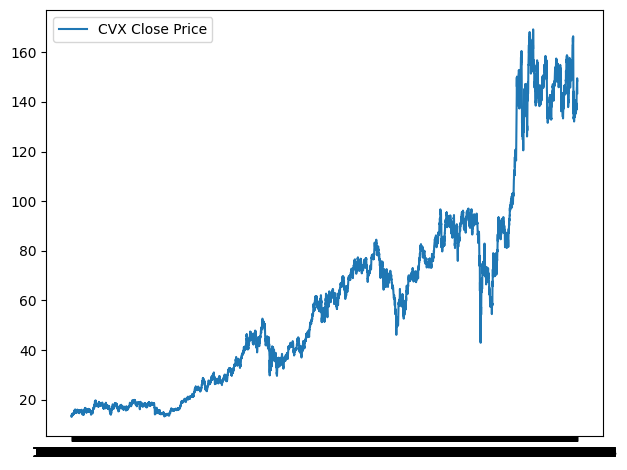

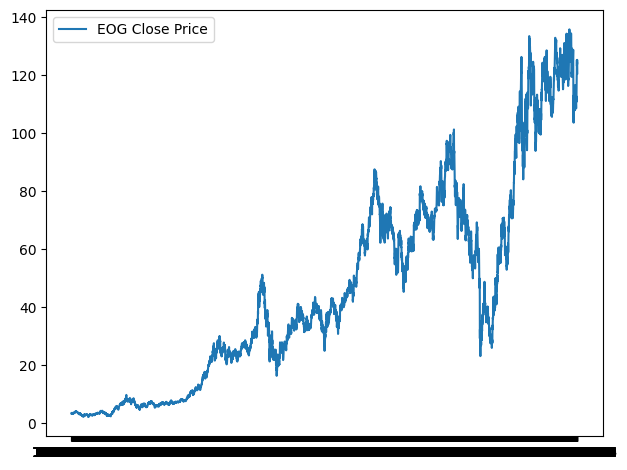

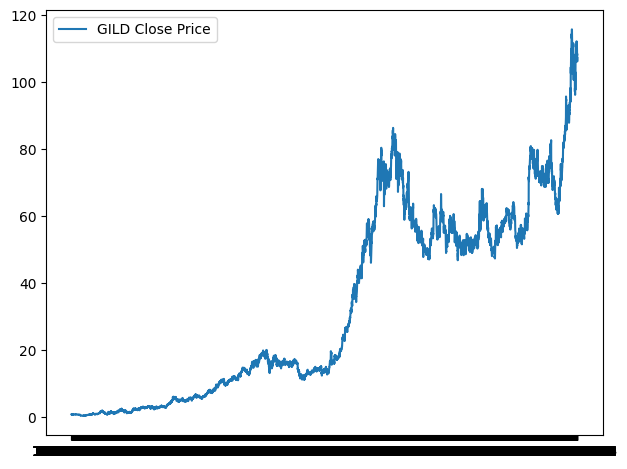

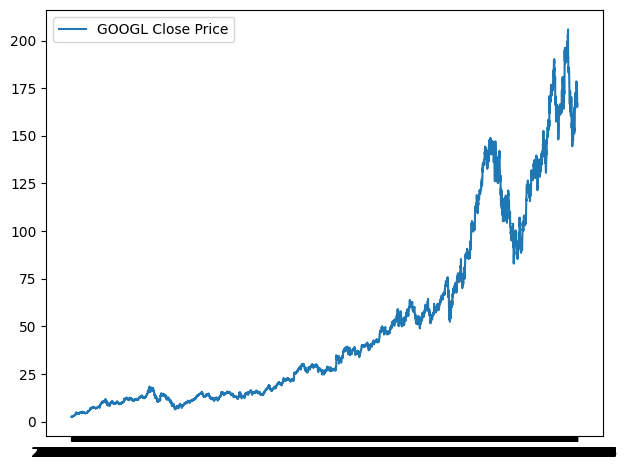

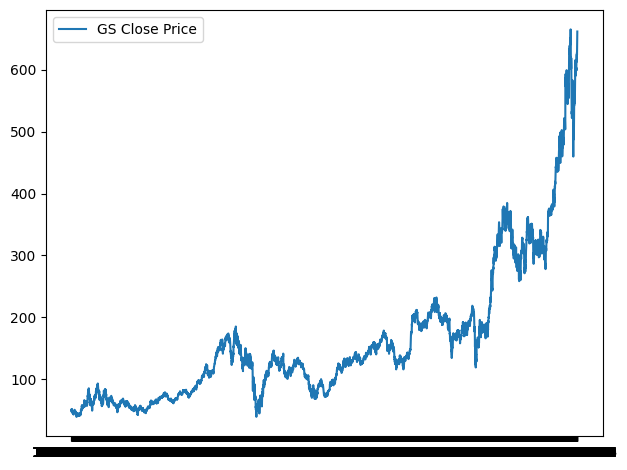

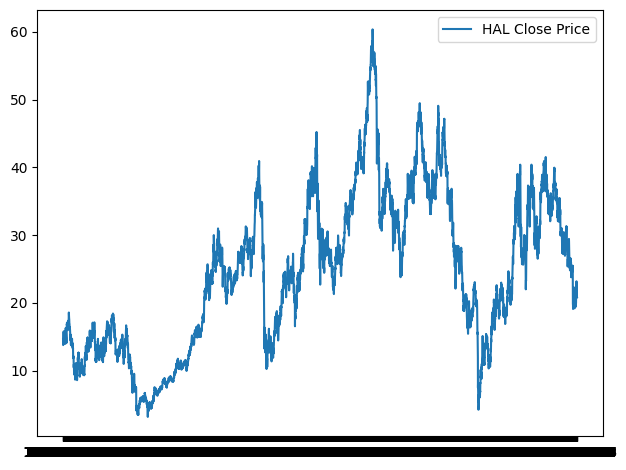

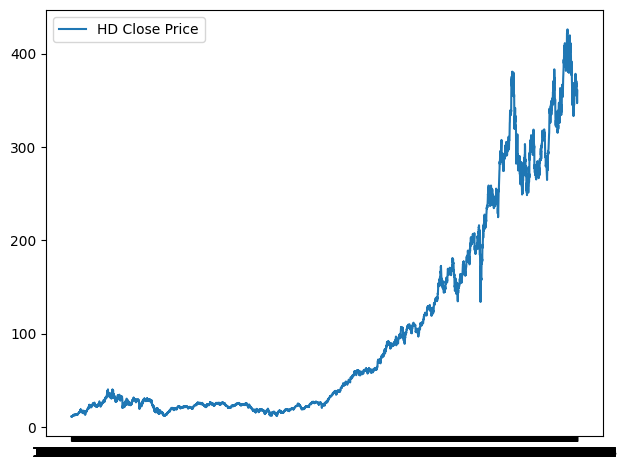

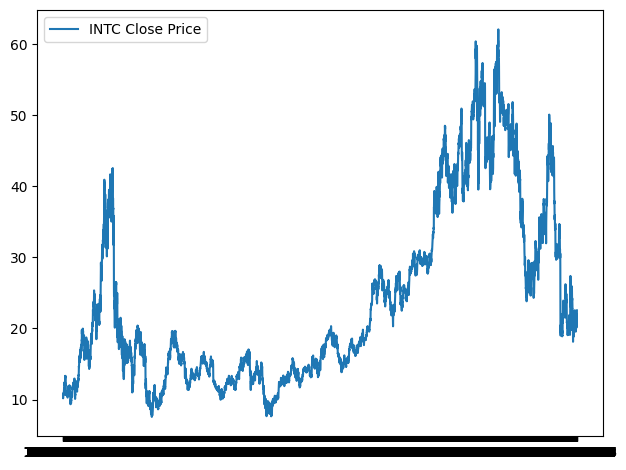

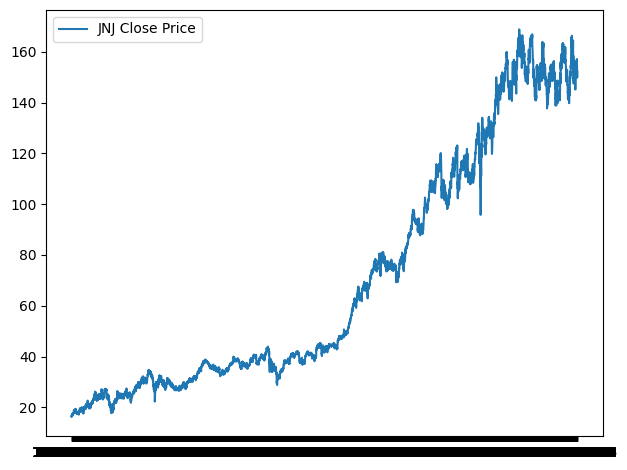

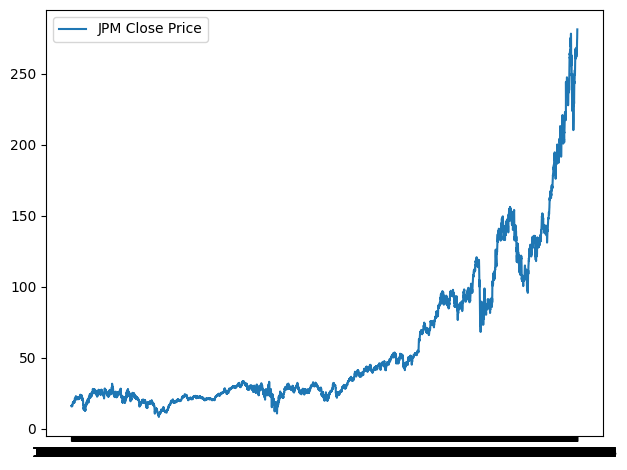

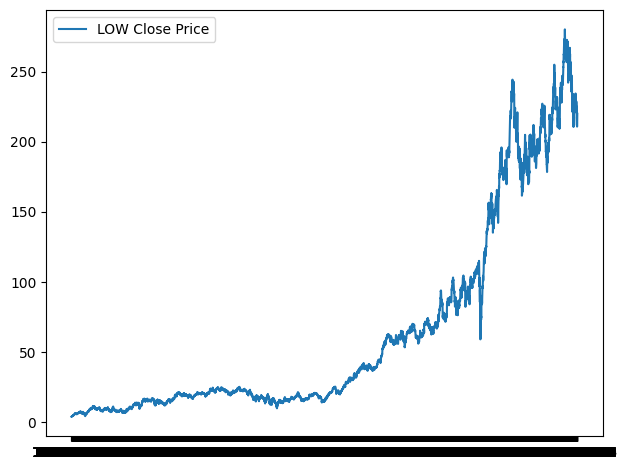

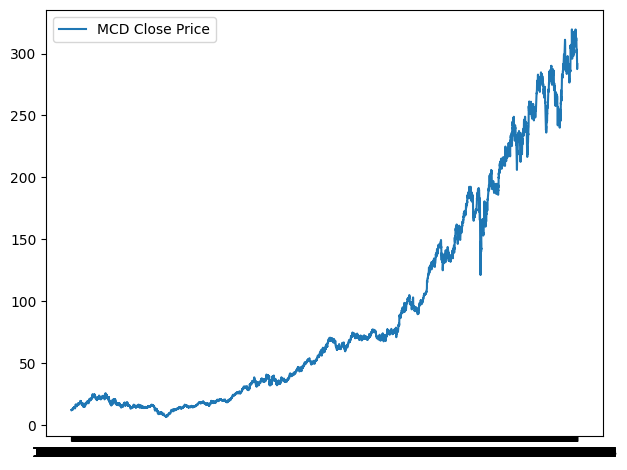

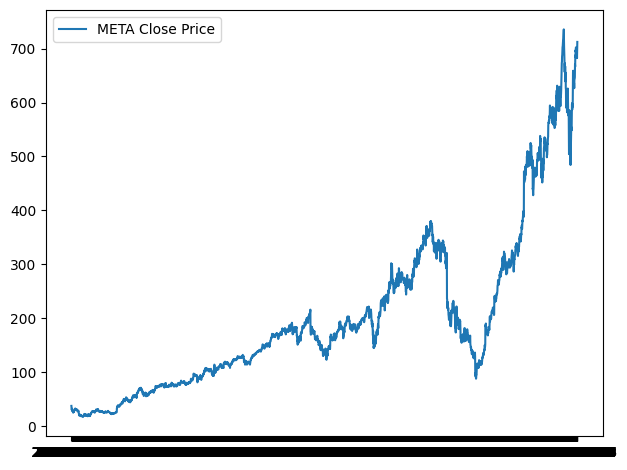

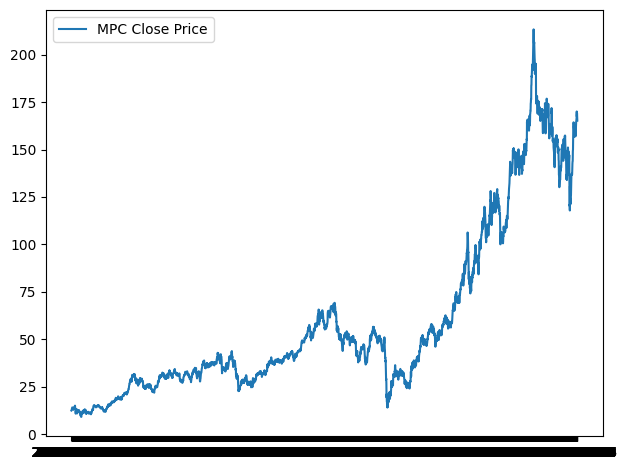

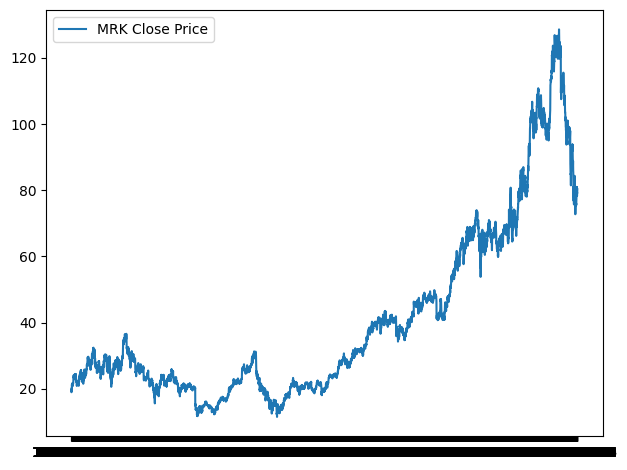

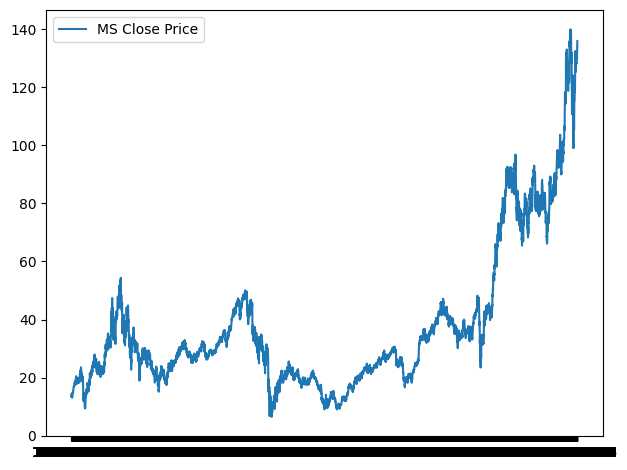

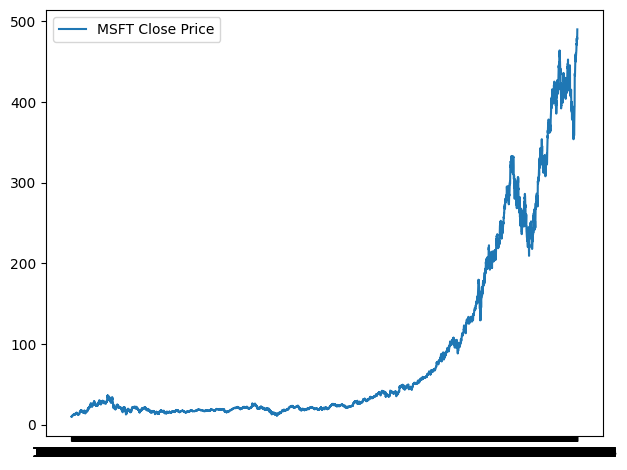

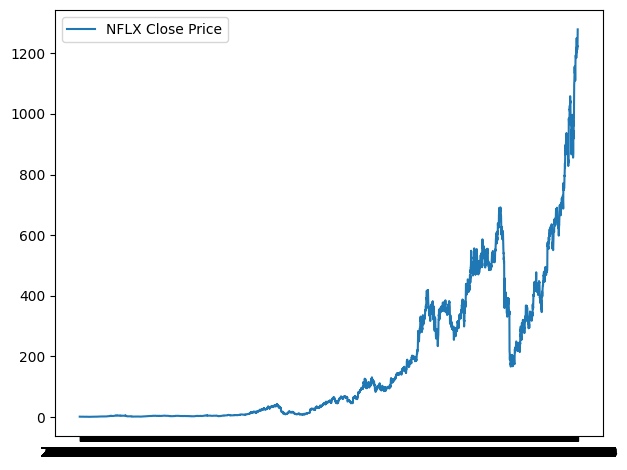

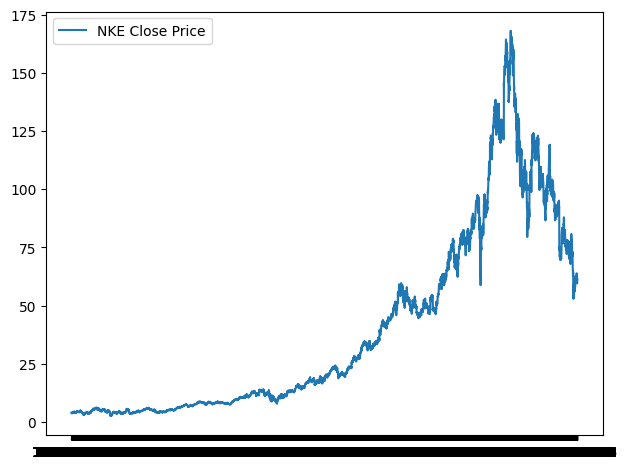

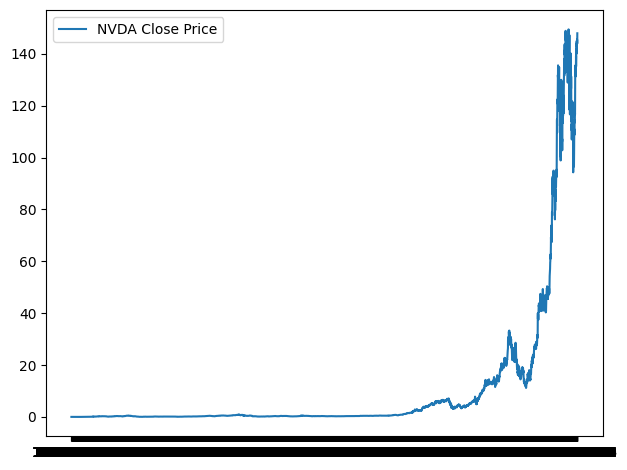

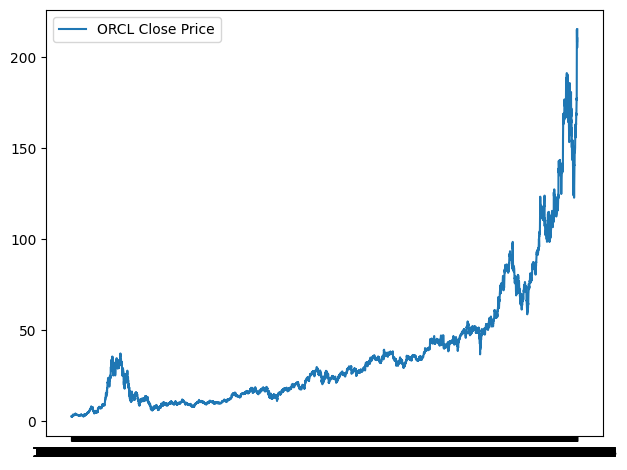

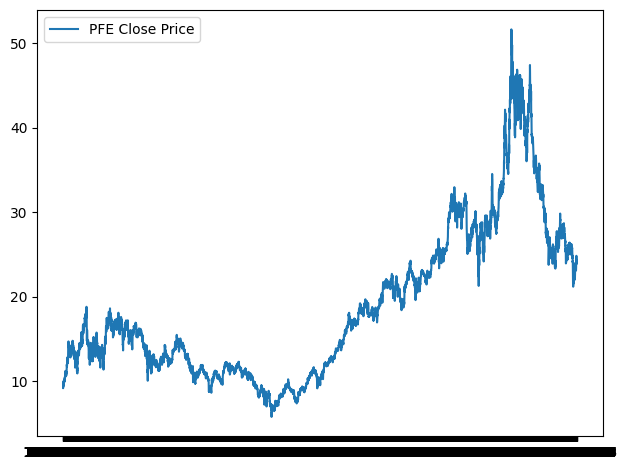

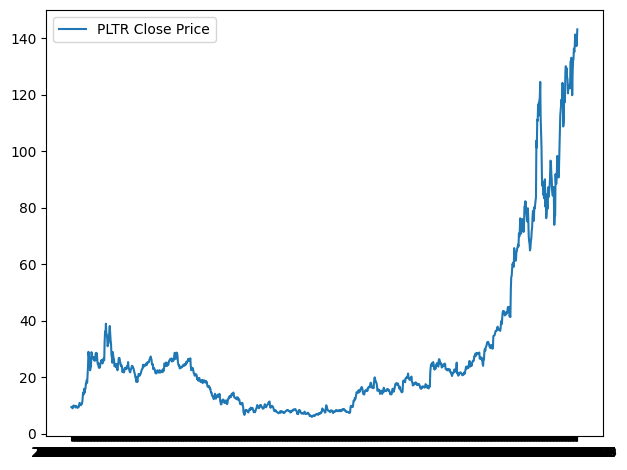

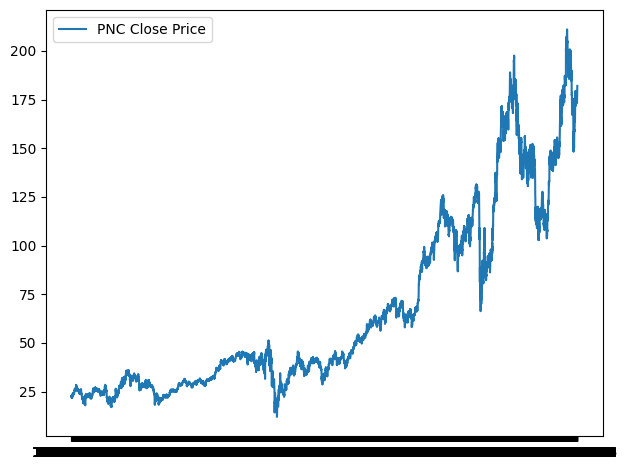

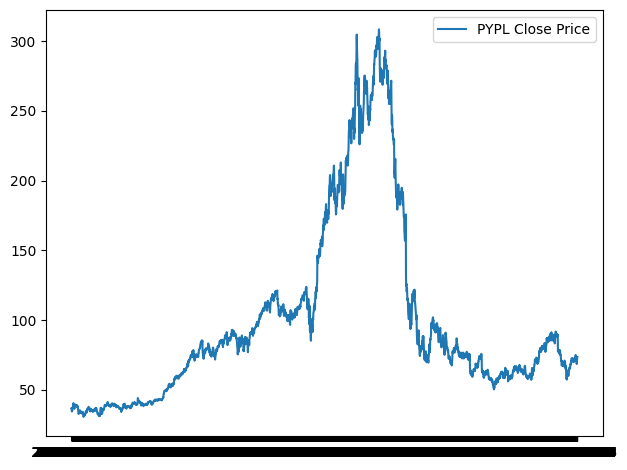

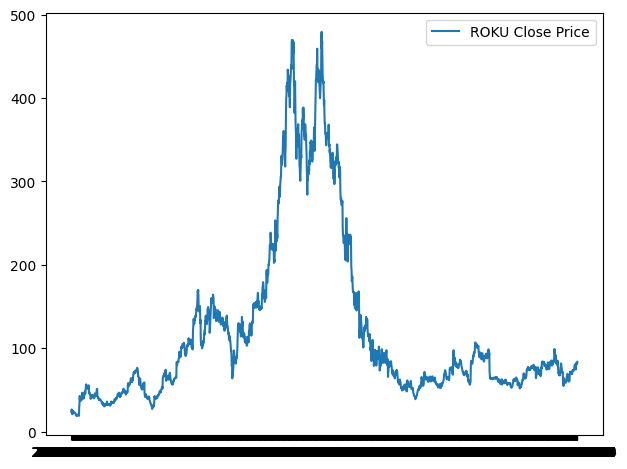

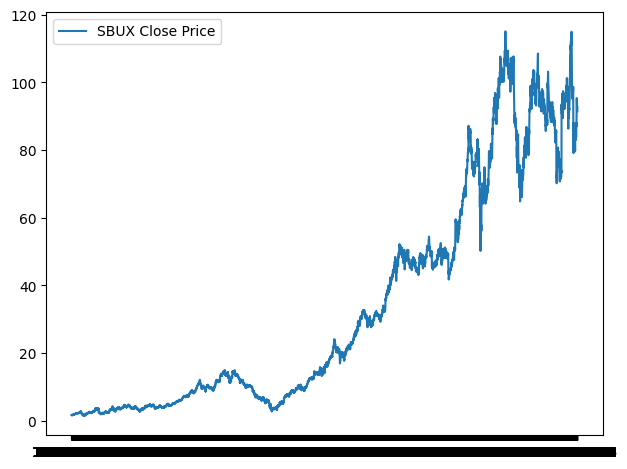

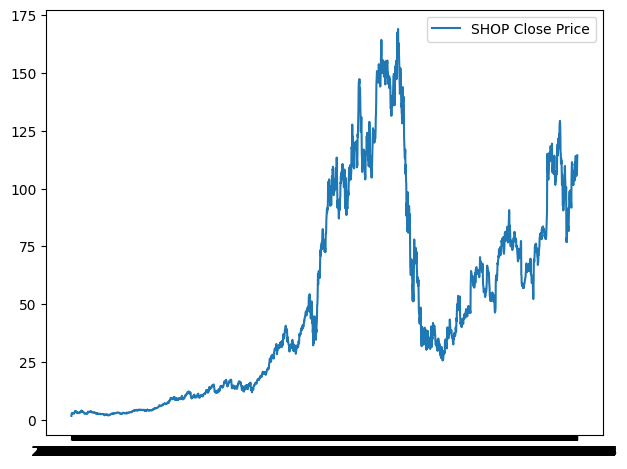

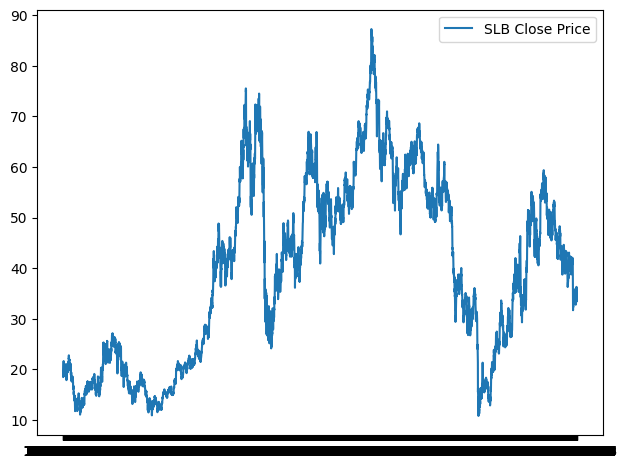

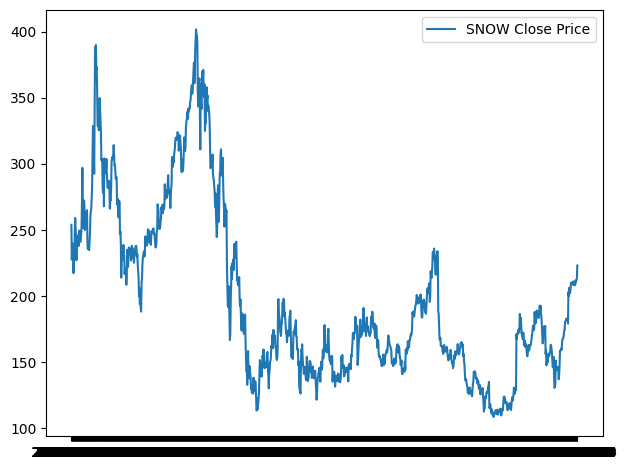

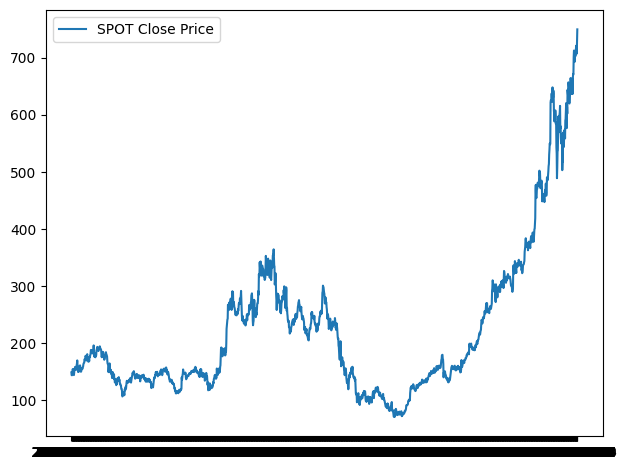

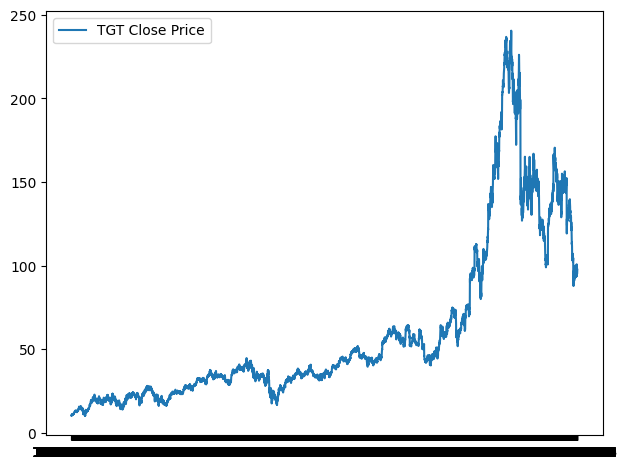

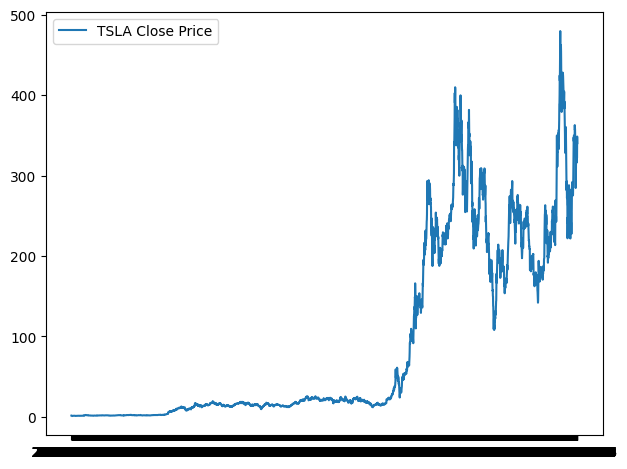

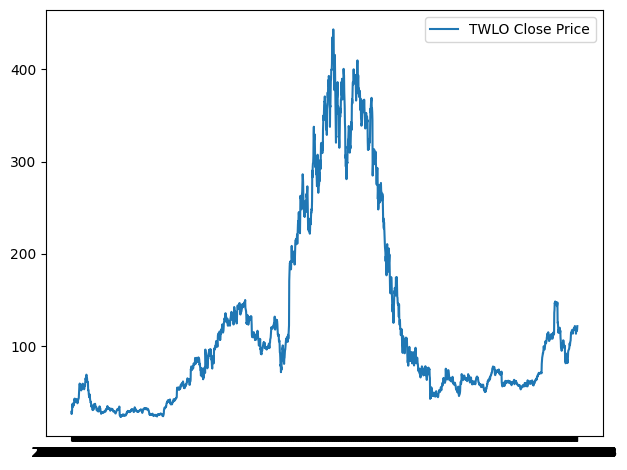

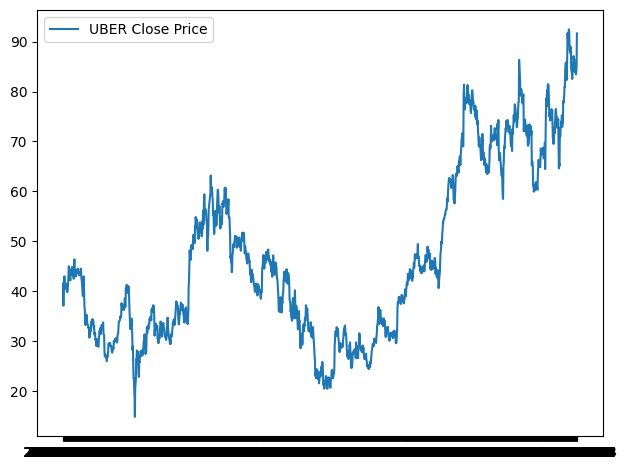

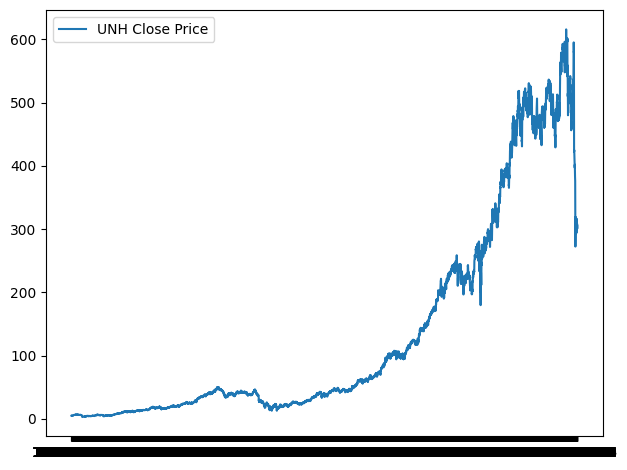

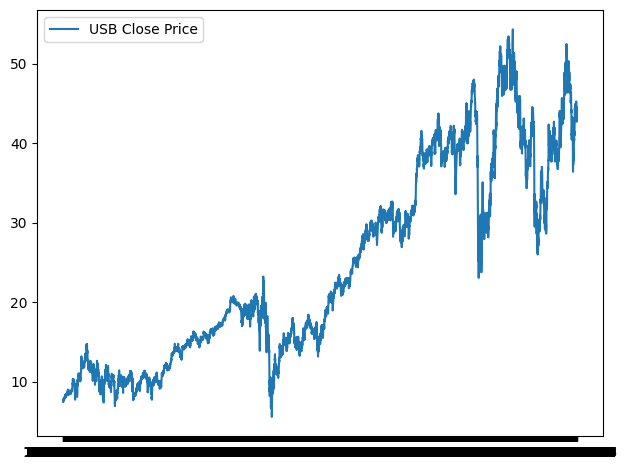

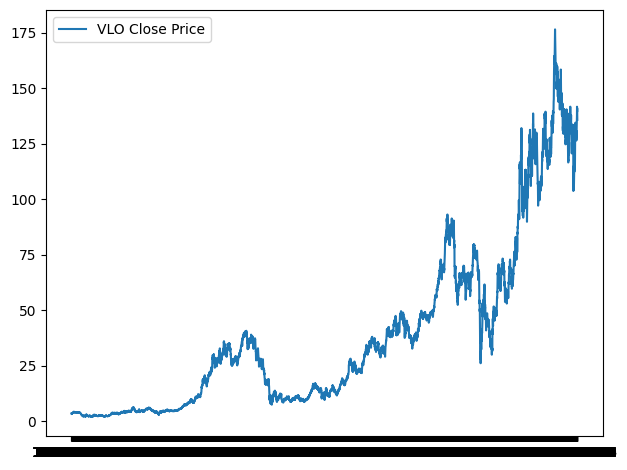

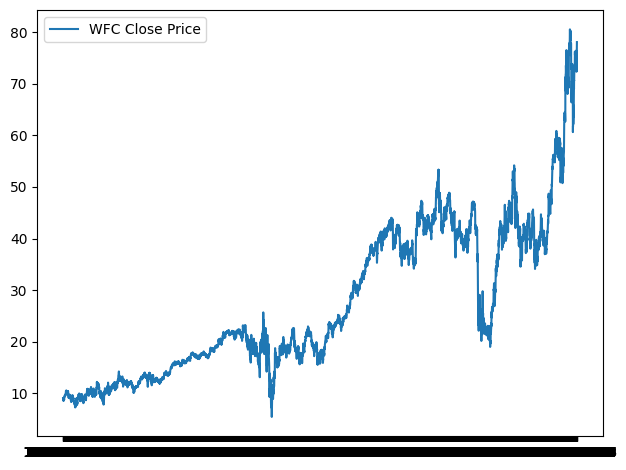

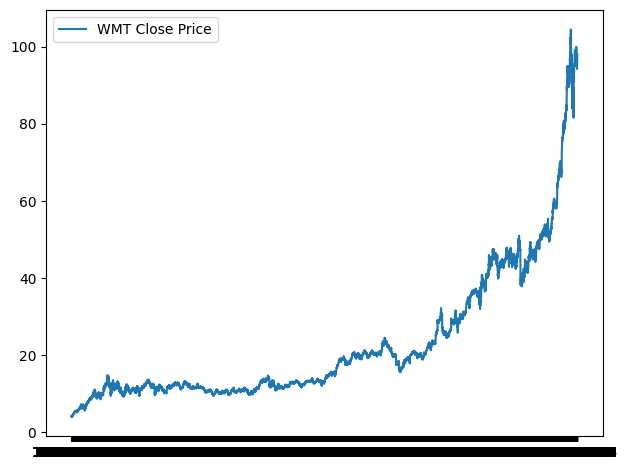

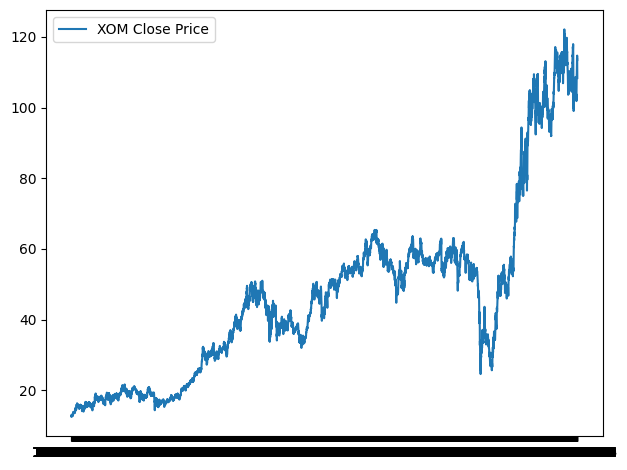

In [8]:
# x axis => Date
# y axis => Closing Price
for symbol in stocks:
    stock_data = df[df['Symbol'] == symbol]

    plt.plot(stock_data['Date'], stock_data['Close'],label=f'{symbol} Close Price')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Closing price of stock per year


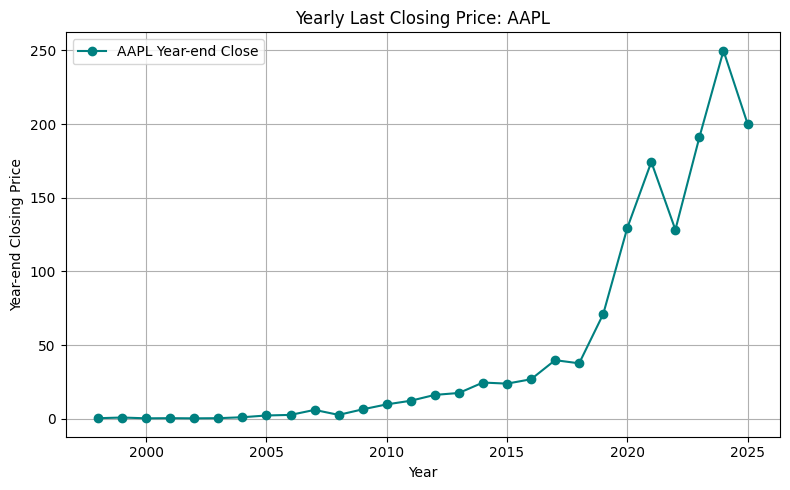

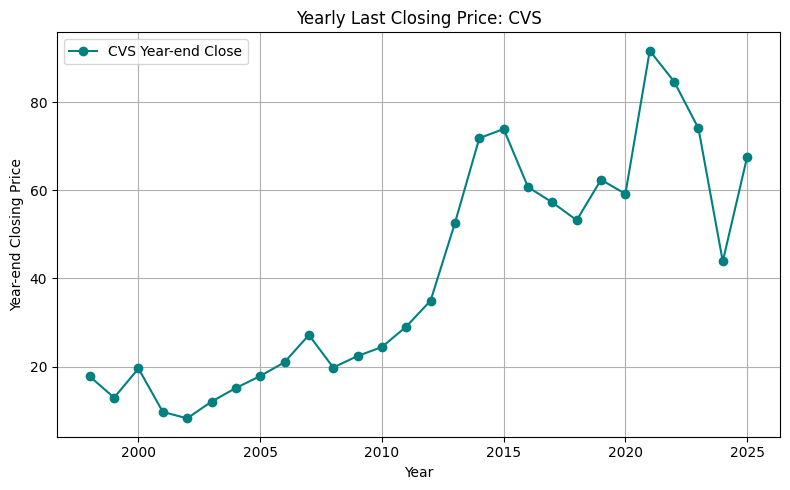

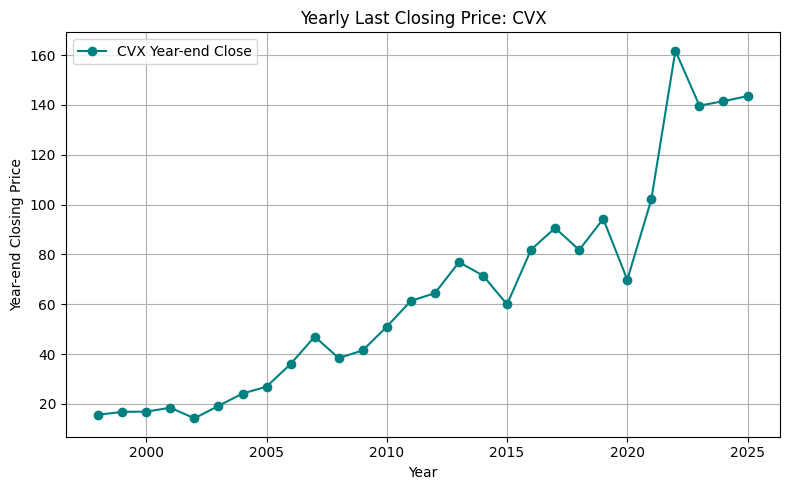

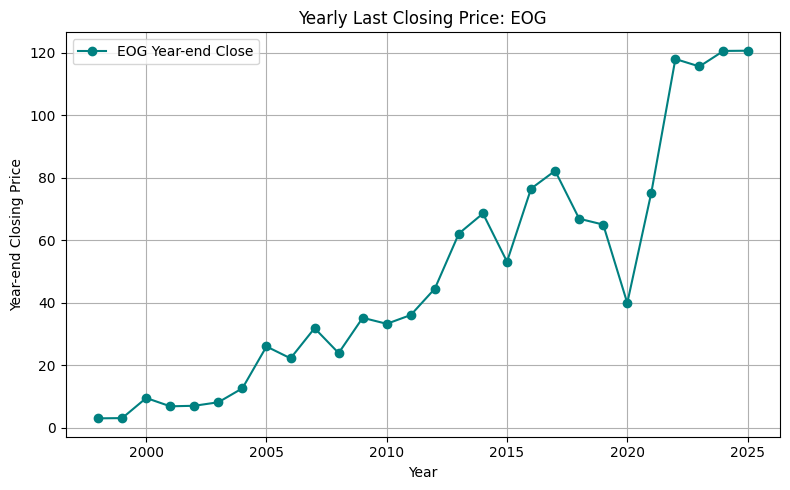

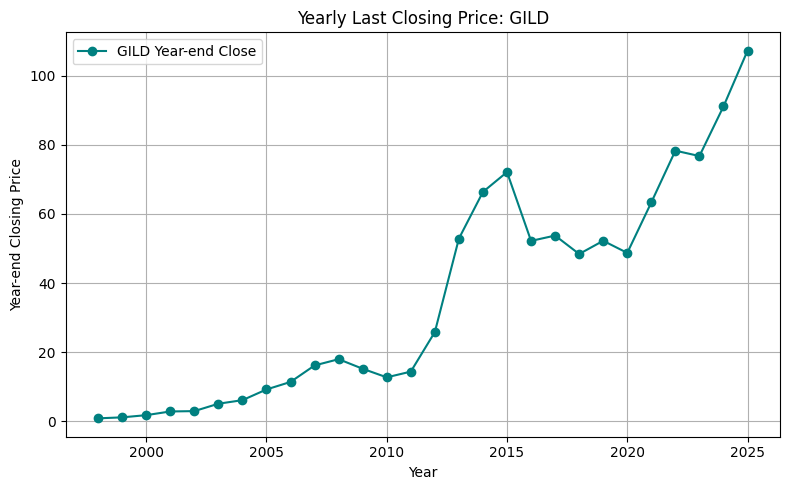

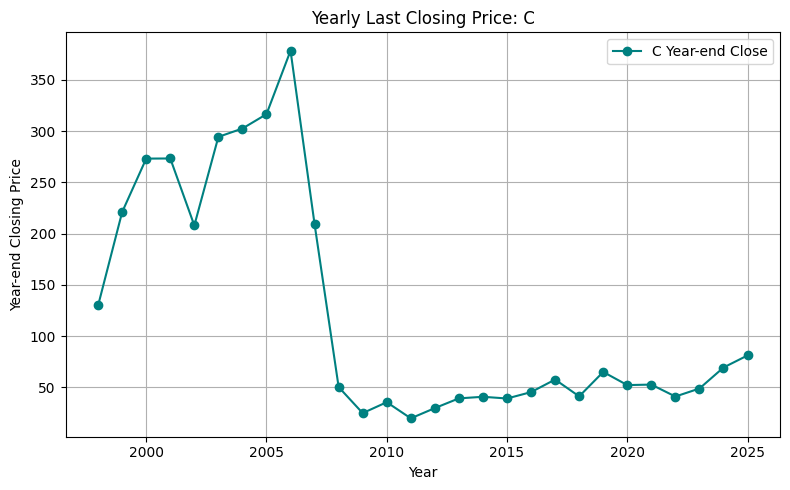

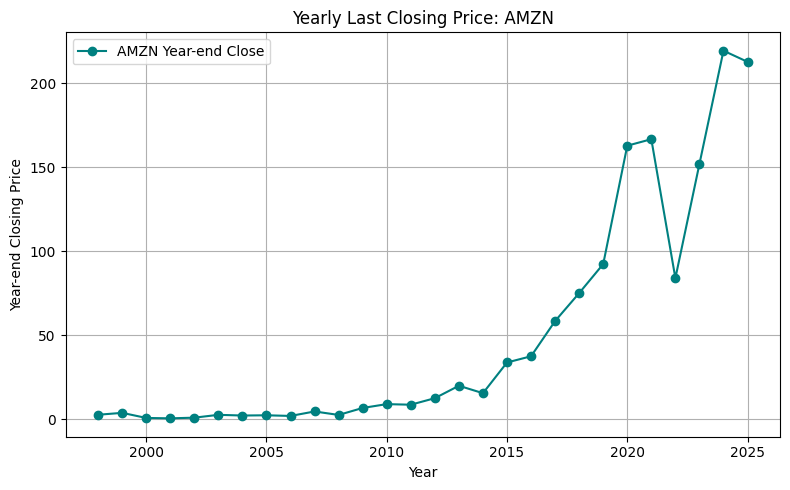

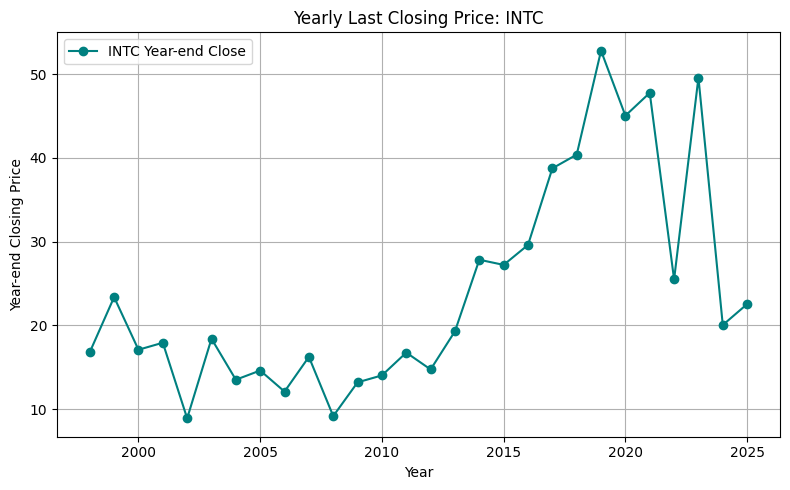

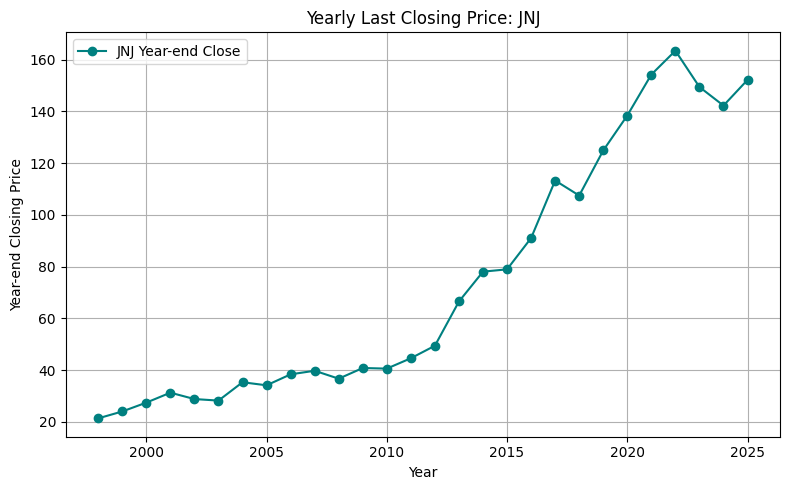

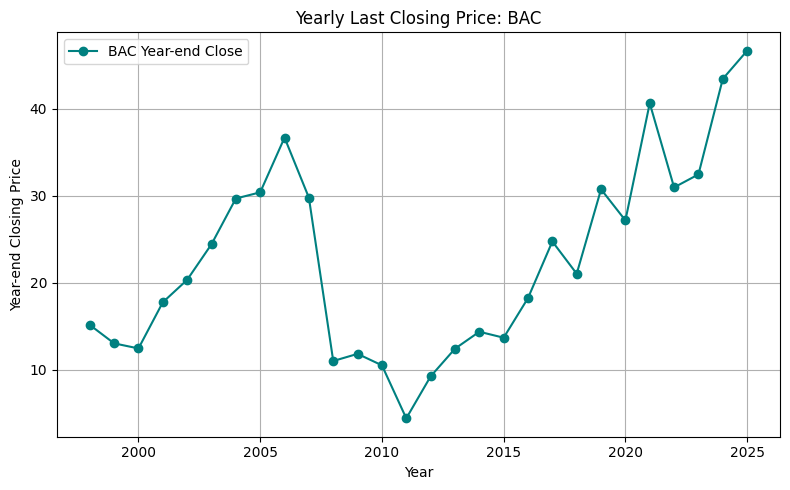

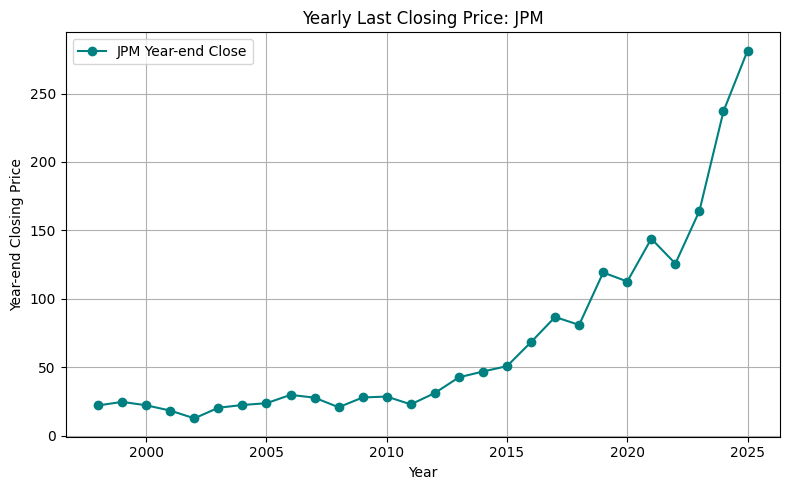

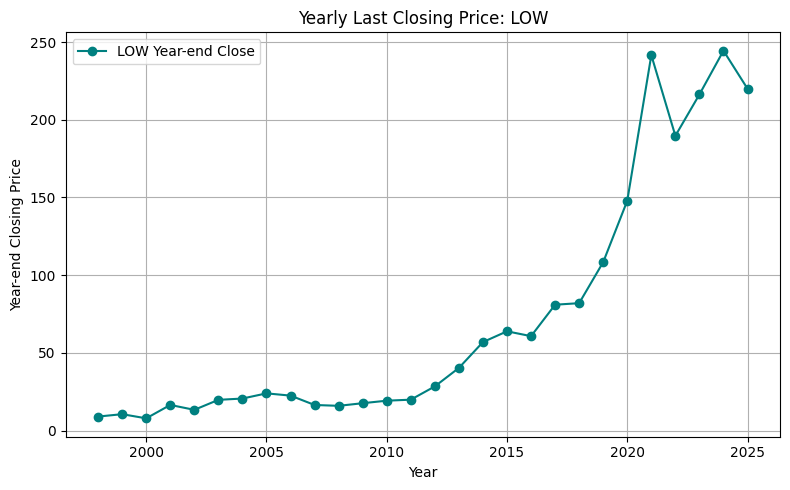

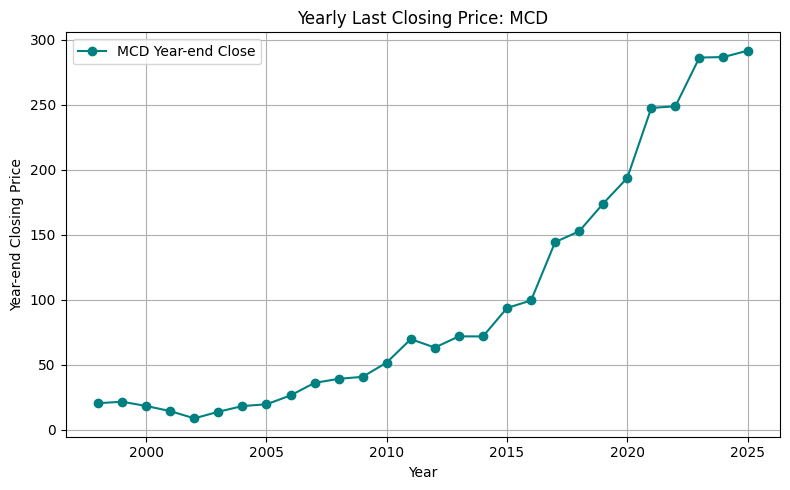

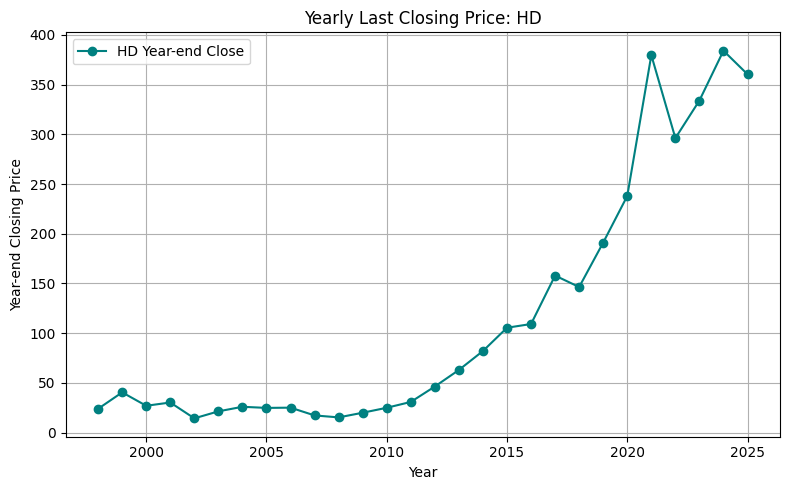

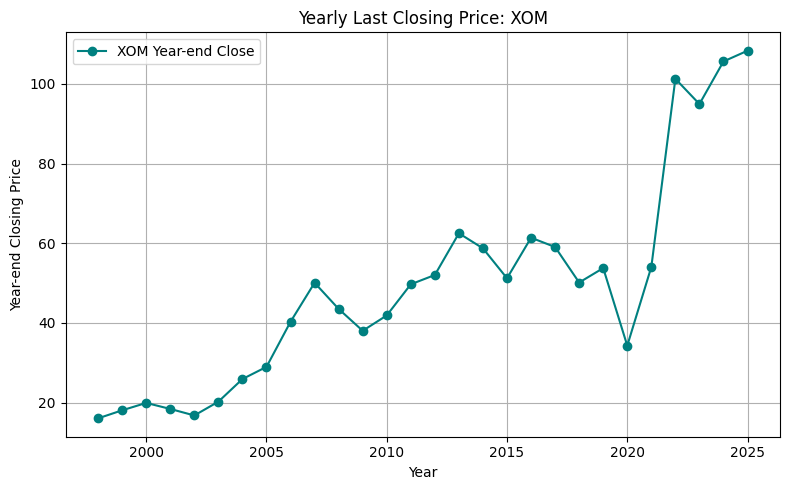

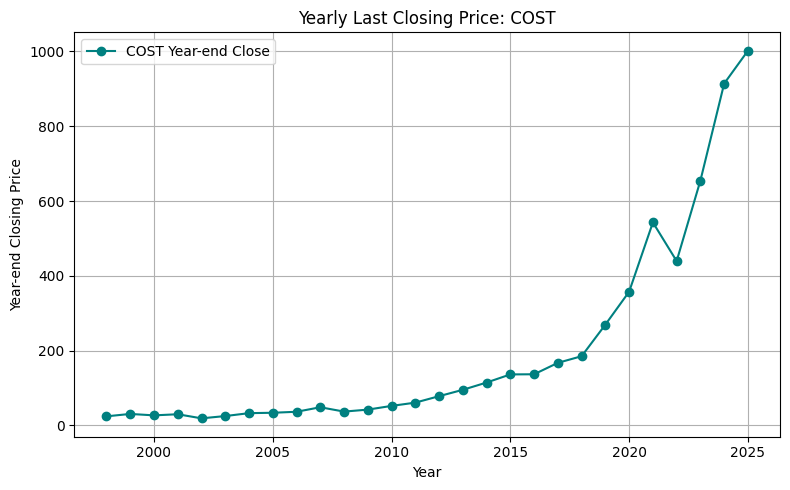

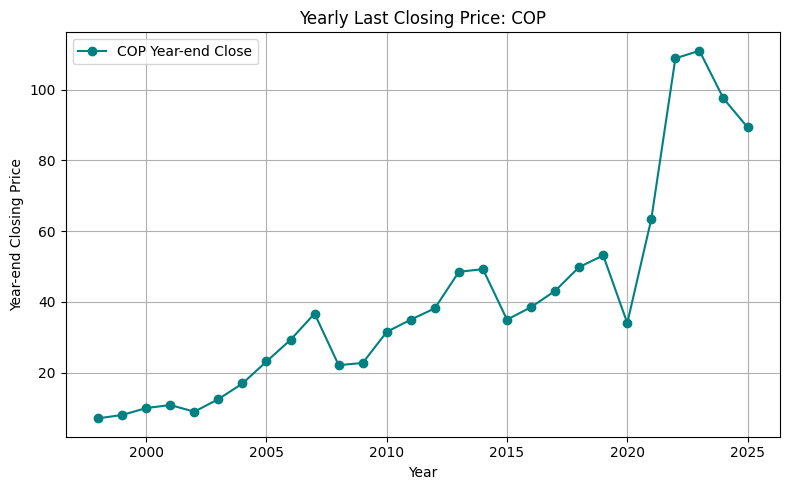

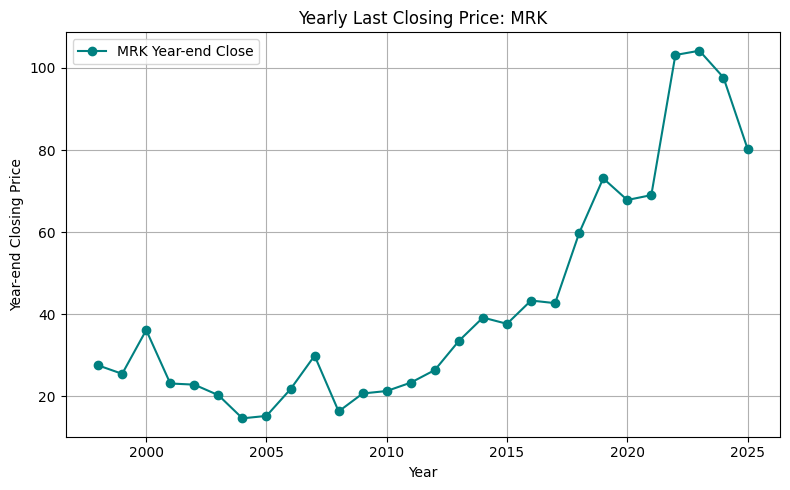

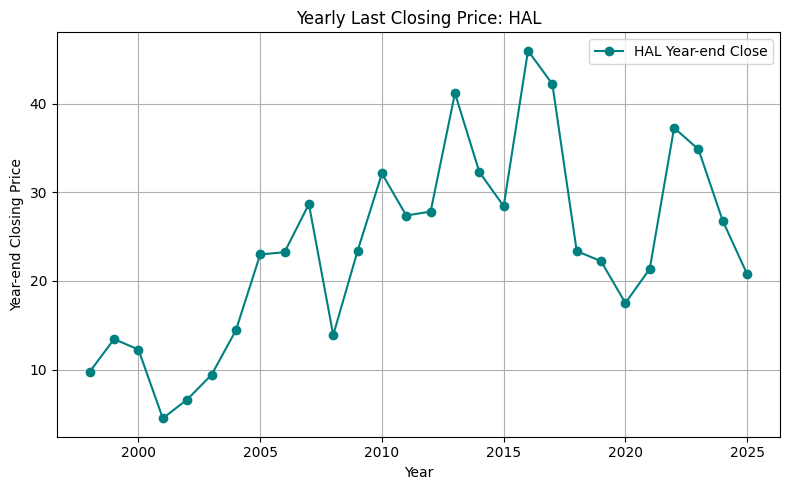

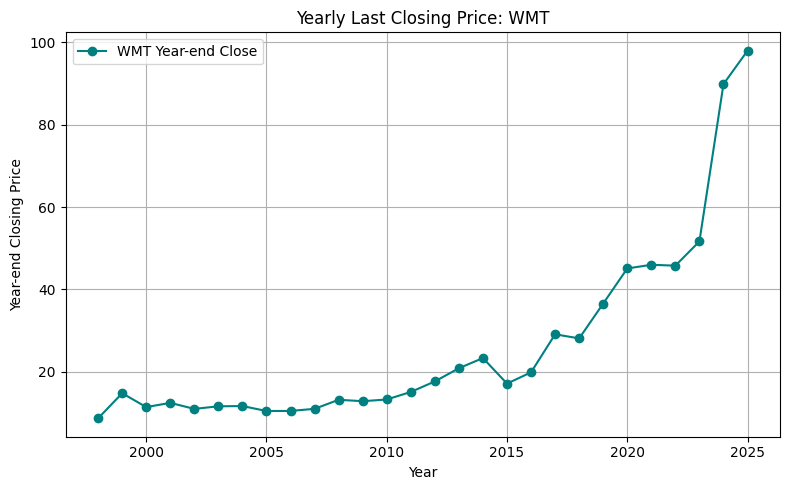

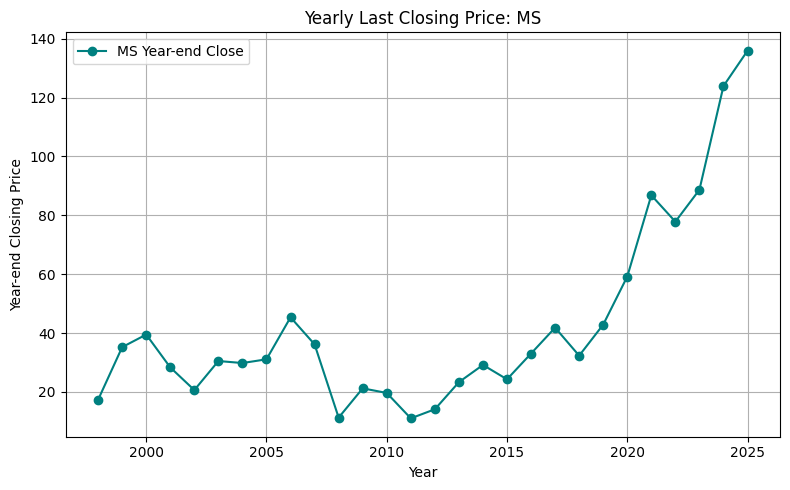

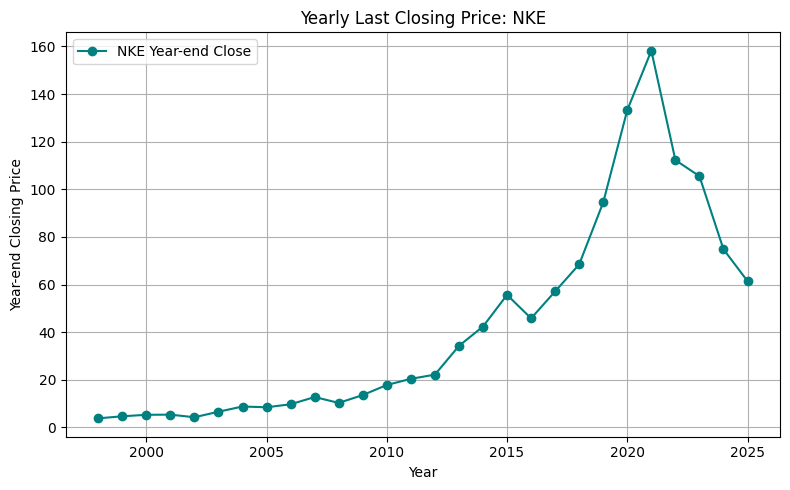

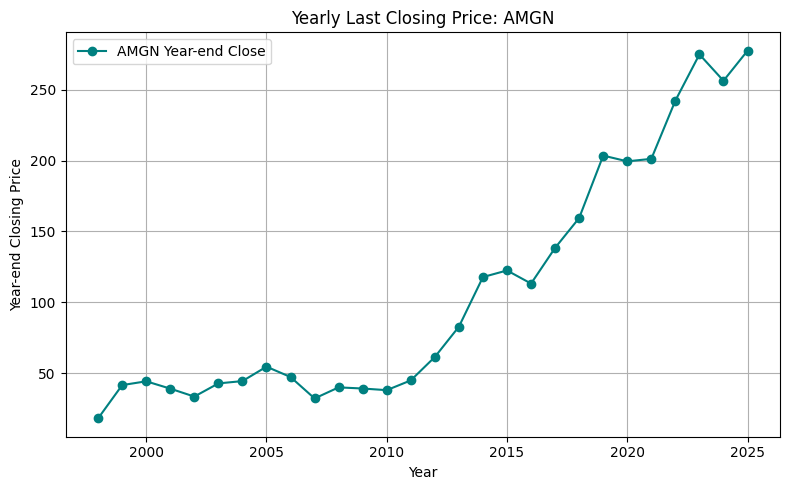

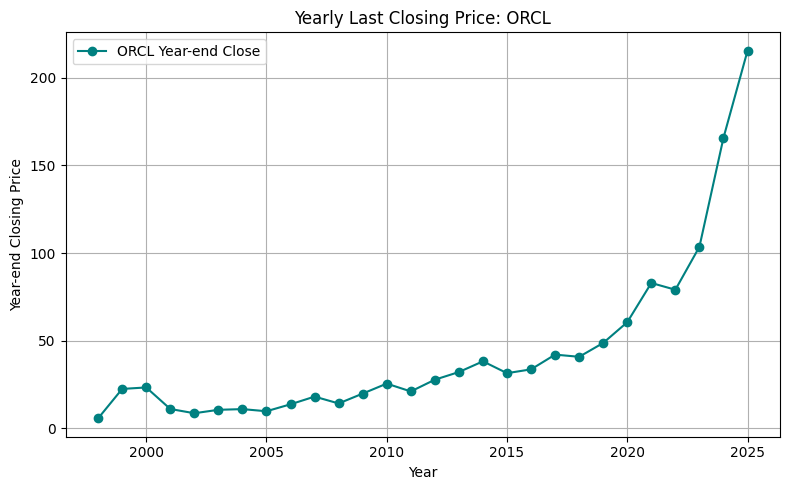

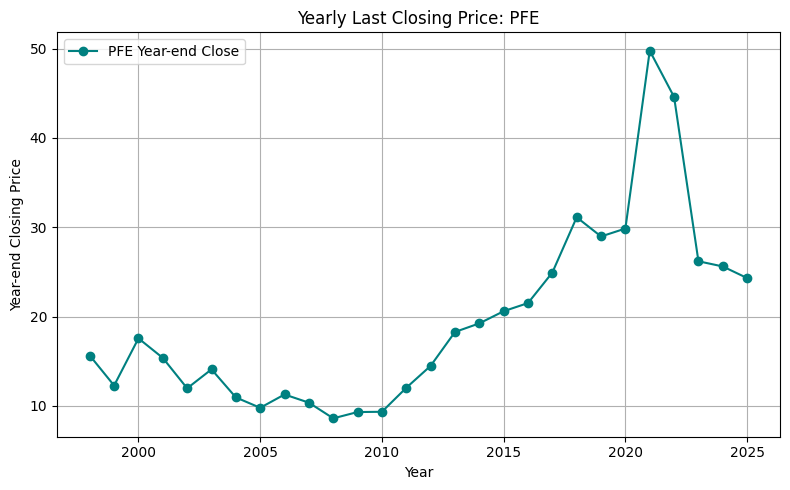

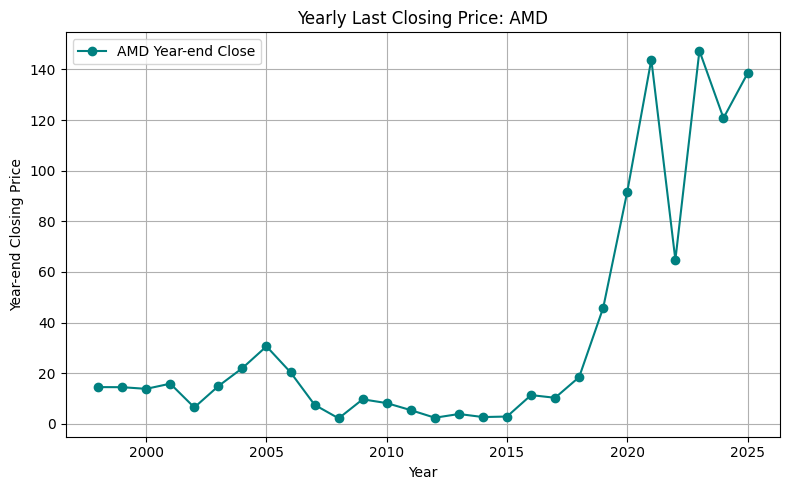

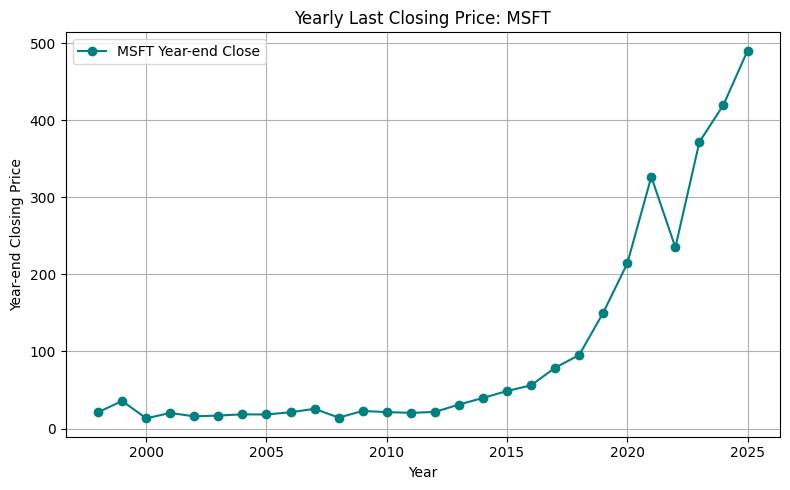

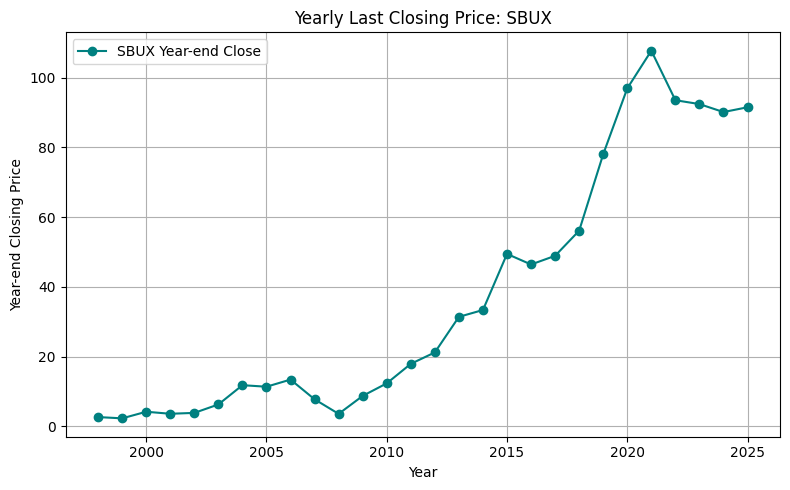

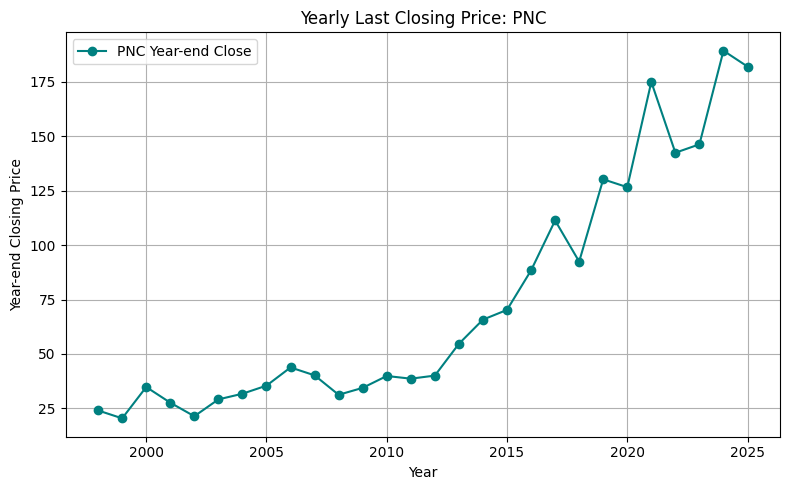

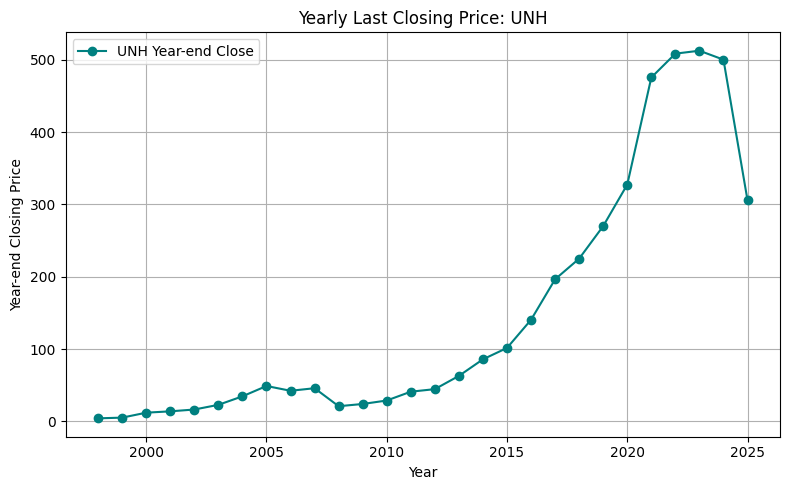

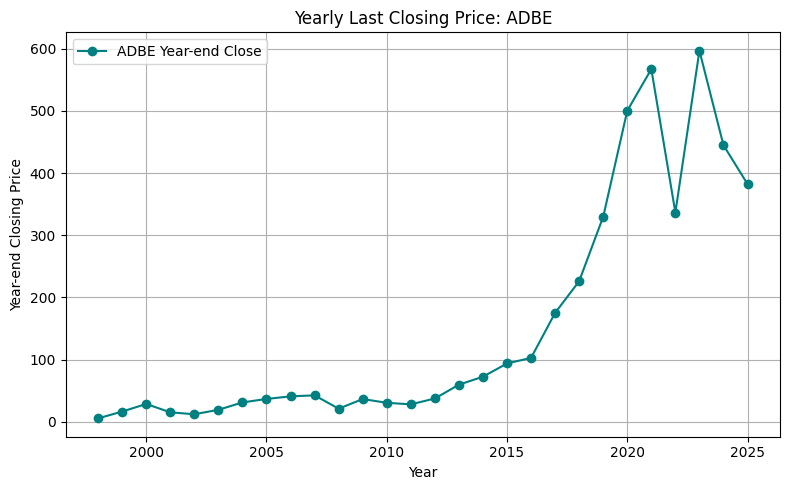

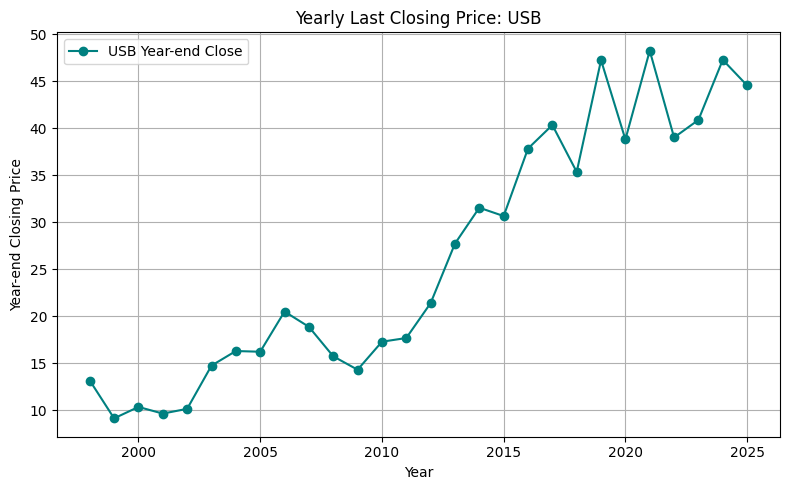

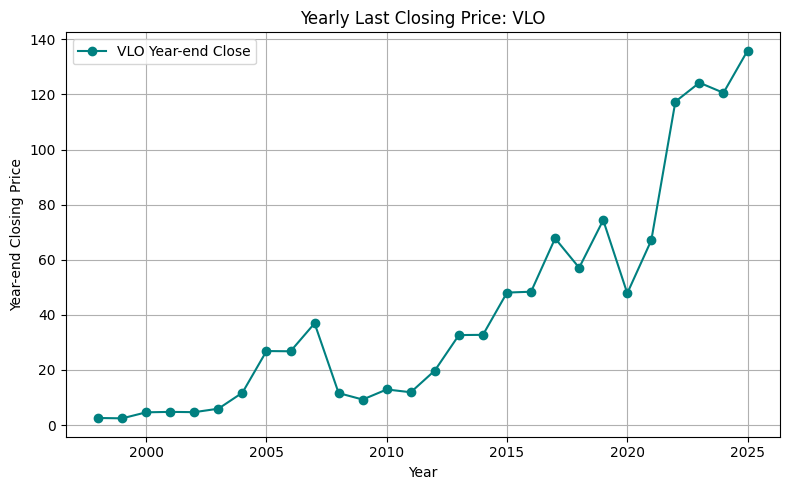

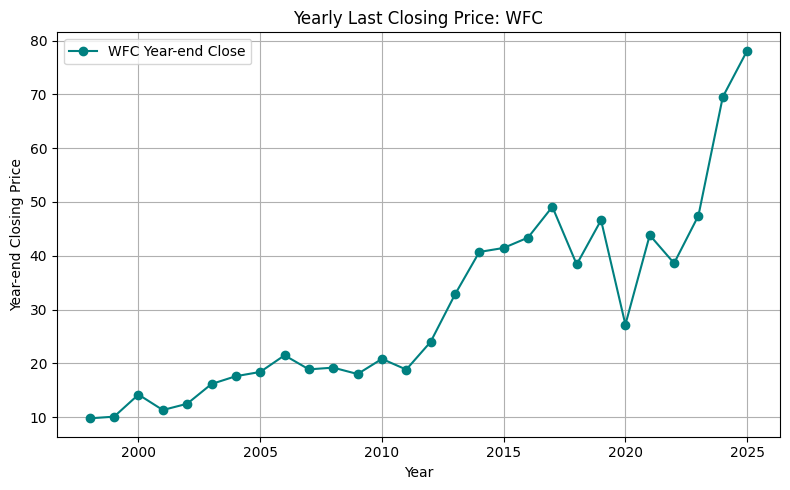

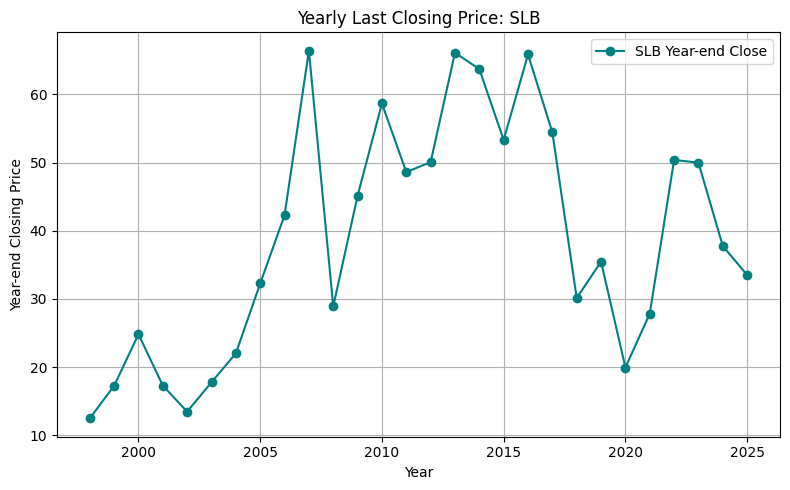

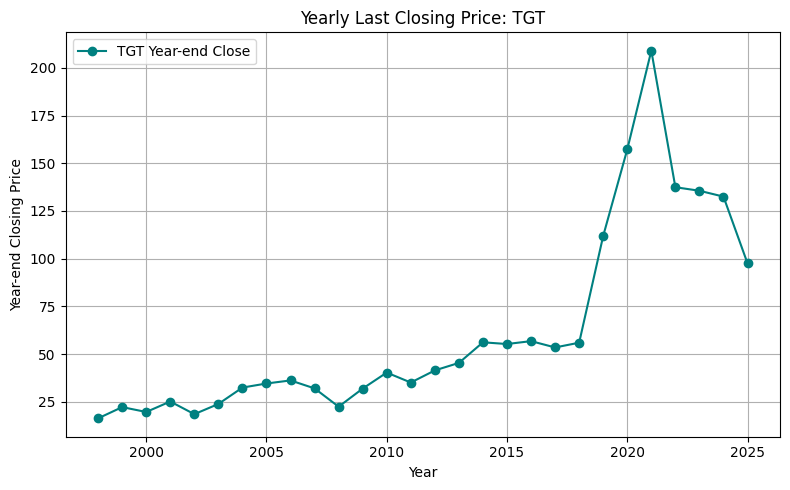

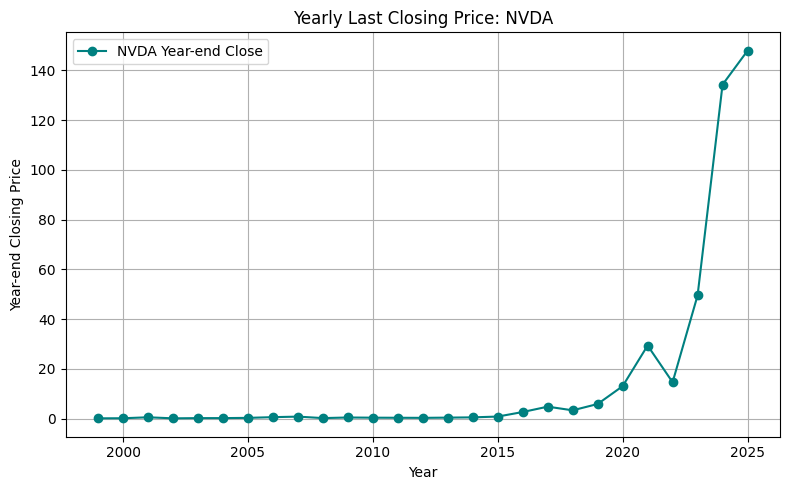

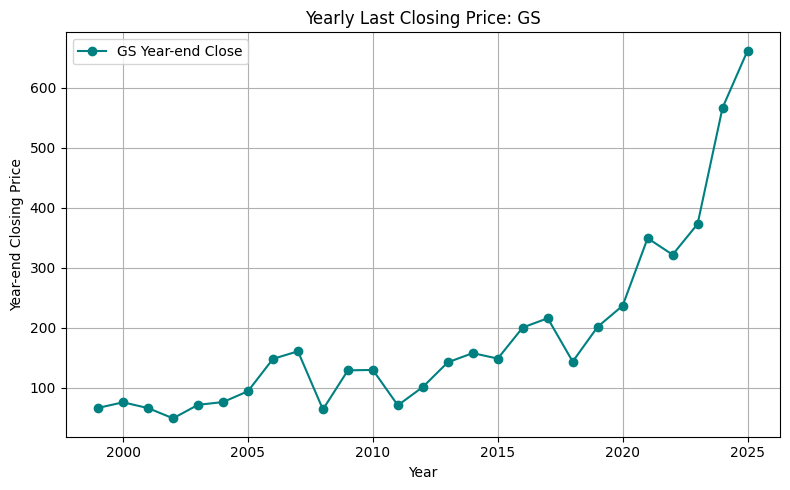

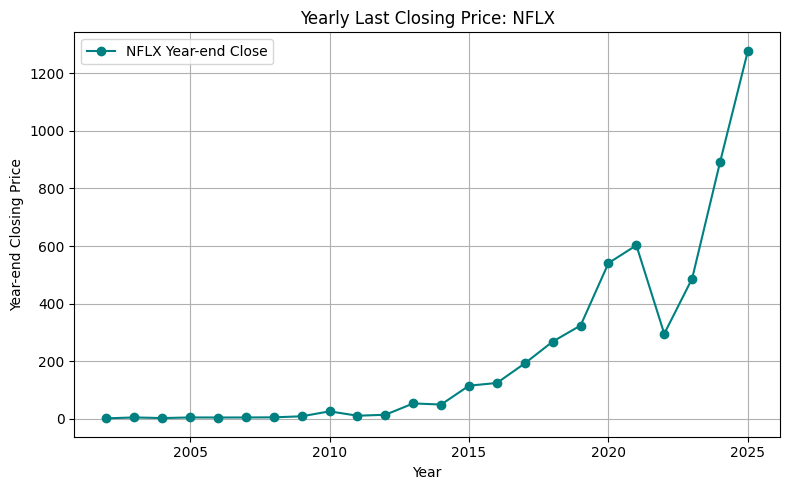

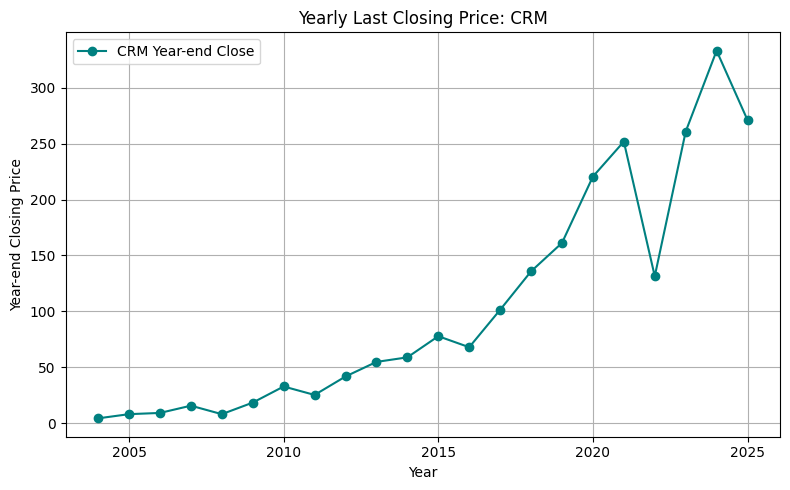

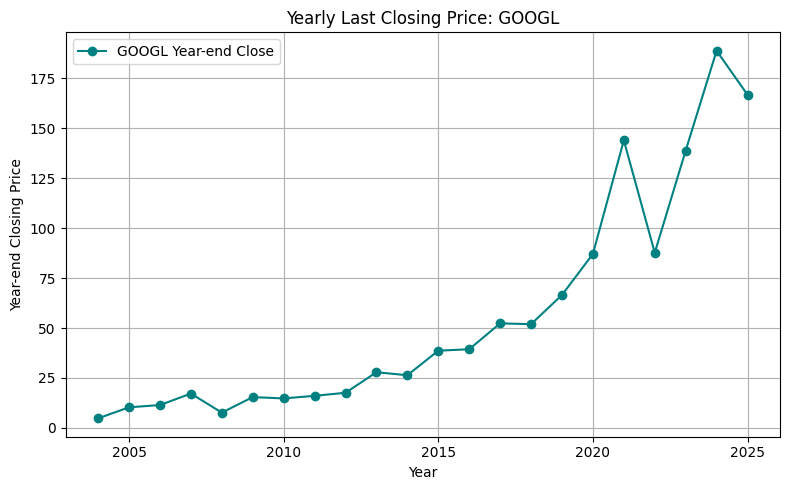

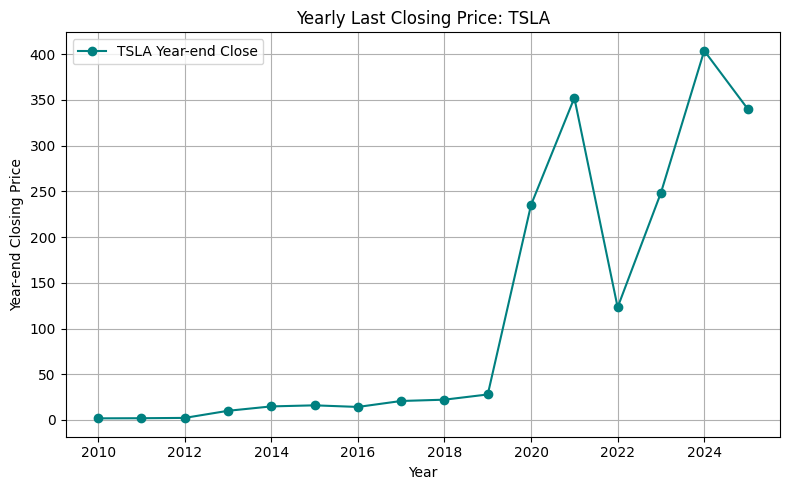

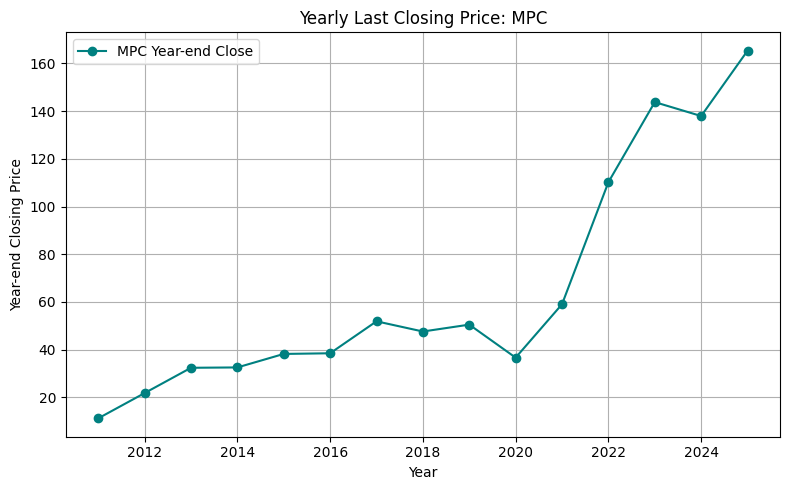

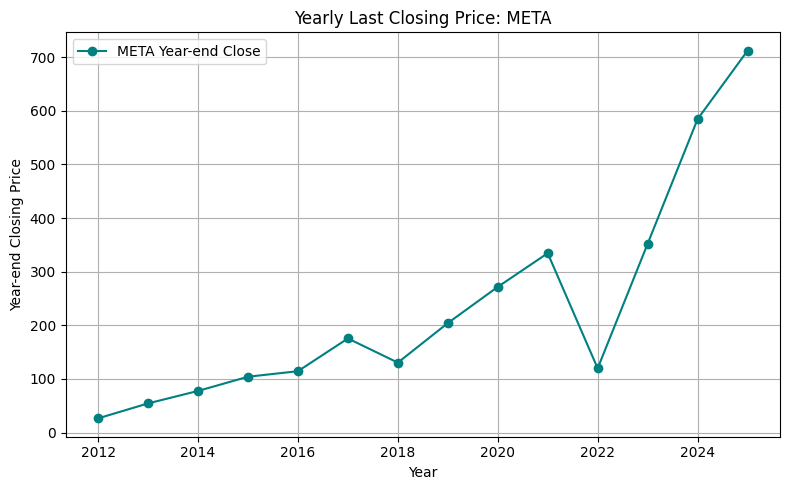

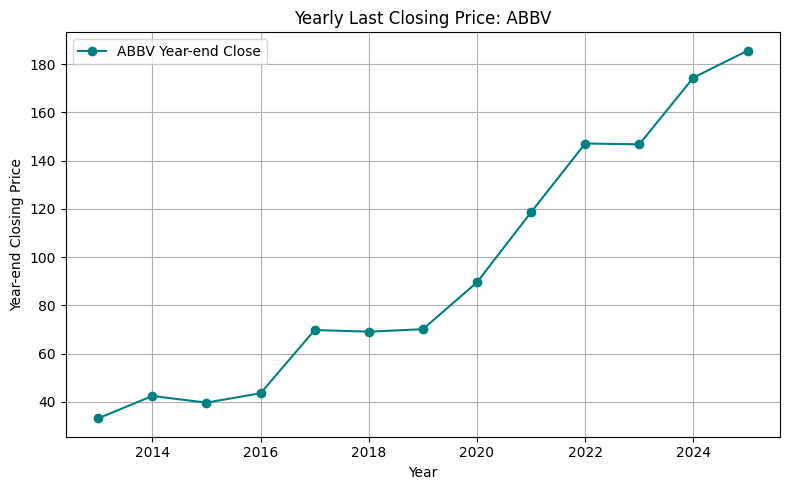

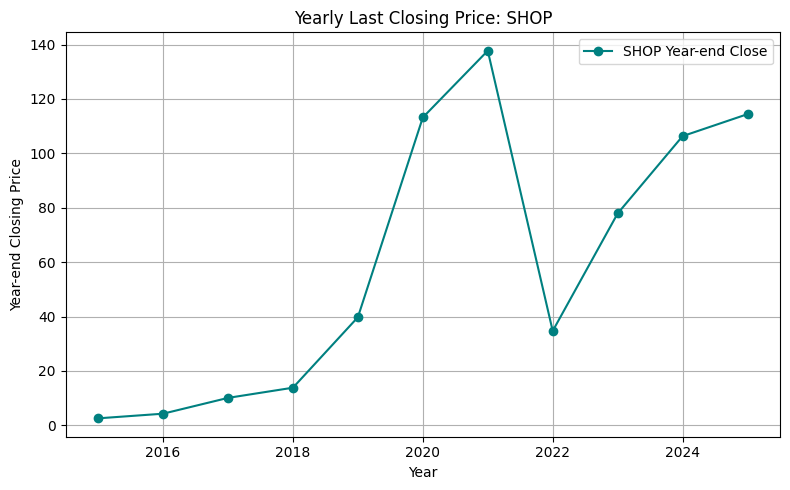

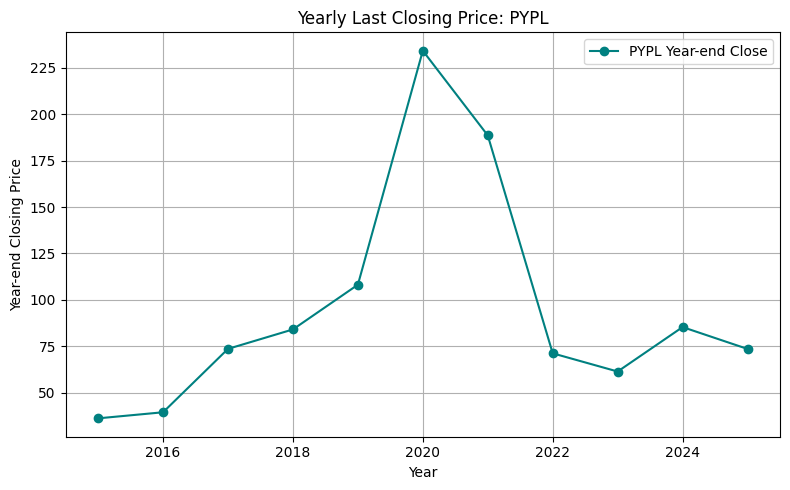

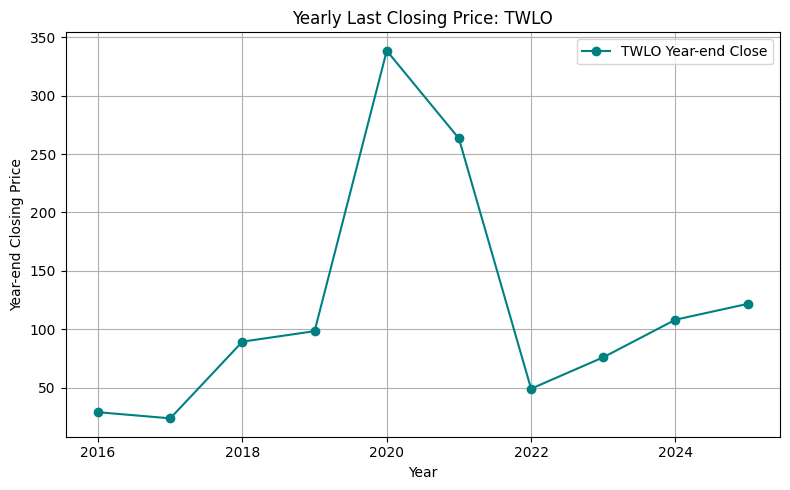

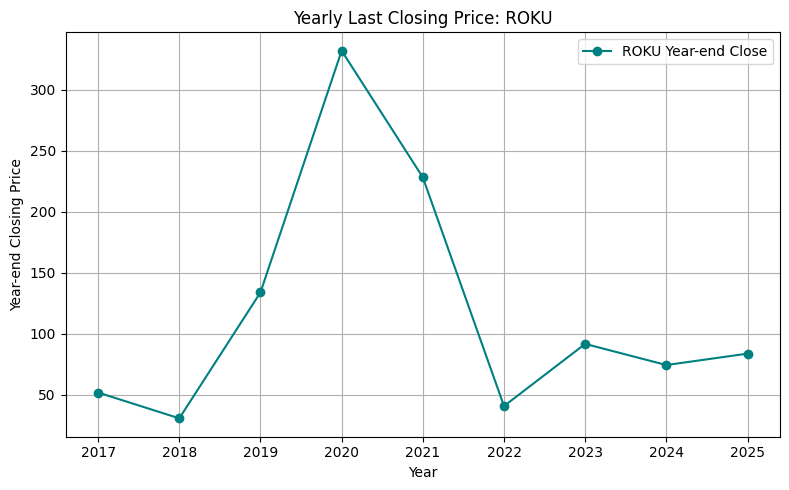

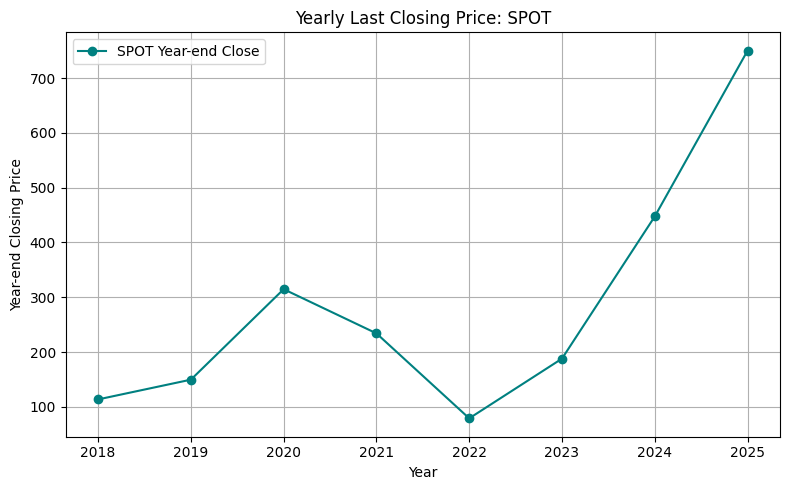

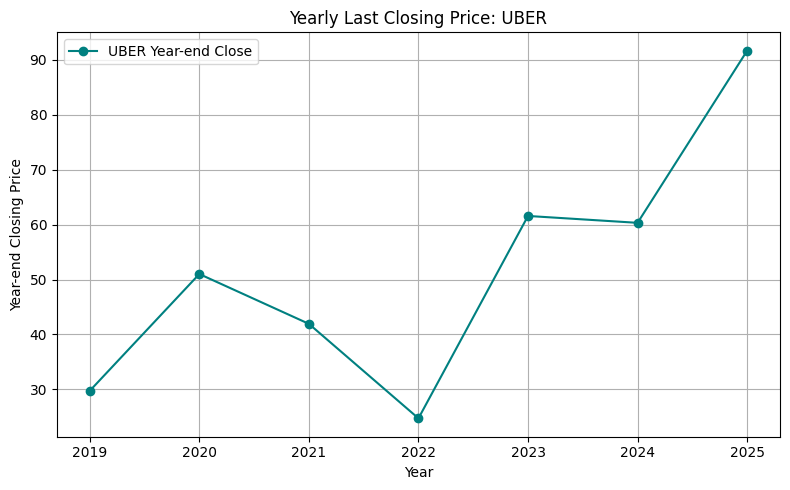

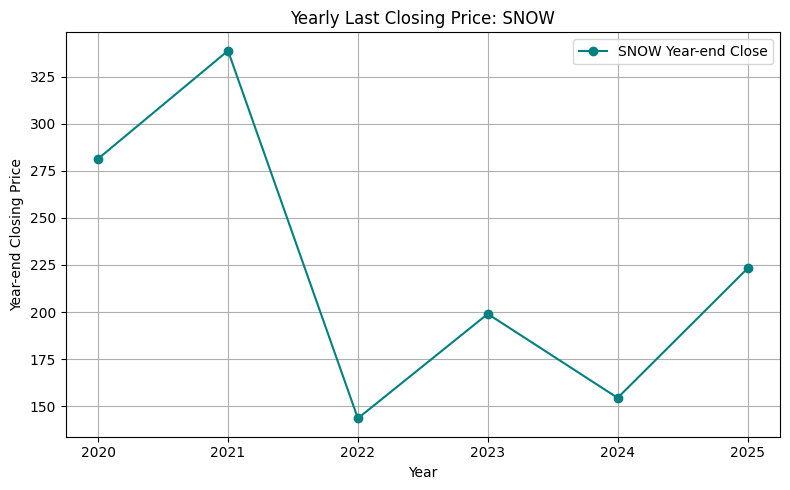

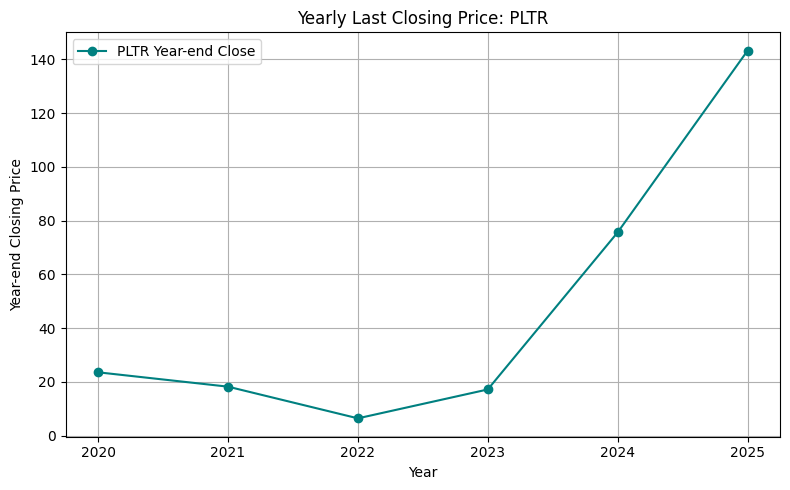

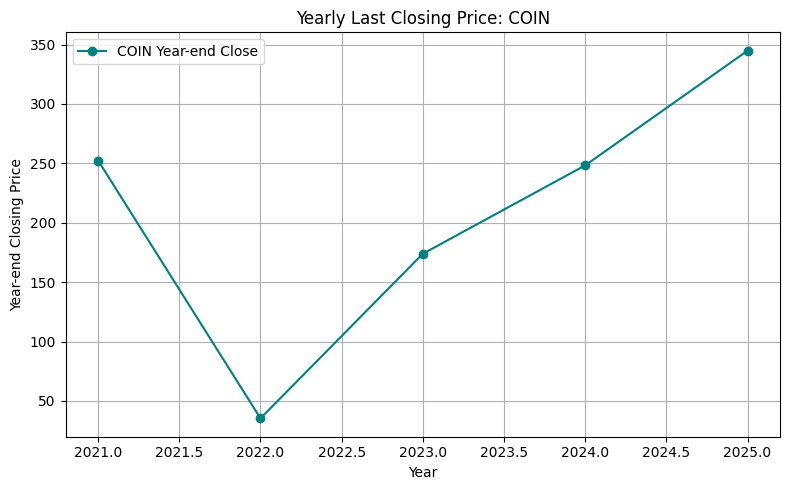

In [10]:

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df.sort_values(by='Date', inplace=True)

# Extract Year
df['Year'] = df['Date'].dt.year

# Get the last entry for each Symbol-Year combination
yearly_last = df.groupby(['Symbol', 'Year']).tail(1)

# Plot each stock's yearly closing prices in separate plots
stocks = df['Symbol'].unique()
for symbol in stocks:
    symbol_data = yearly_last[yearly_last['Symbol'] == symbol]

    plt.figure(figsize=(8, 5))  # Optional: to adjust plot size
    plt.plot(symbol_data['Year'], symbol_data['Close'], marker='o', color='teal', label=f'{symbol} Year-end Close')
    plt.xlabel('Year')
    plt.ylabel('Year-end Closing Price')
    plt.title(f'Yearly Last Closing Price: {symbol}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, :])     # All features
        y.append(data[i, 3])                  # Close column index
    return np.array(X), np.array(y)

In [ ]:
time_step = 60

In [ ]:
for symbol in stocks:
    print(f"\n🔁 Training for: {symbol}")
    stock_df = df[df['Symbol'] == symbol].reset_index(drop=True)

    if len(stock_df) < time_step + 30:
        print(f"⏭️ Skipped {symbol} (Not enough data)")
        continue


🔁 Training for: AAPL

🔁 Training for: ABBV

🔁 Training for: ADBE

🔁 Training for: AMD

🔁 Training for: AMGN

🔁 Training for: AMZN

🔁 Training for: BAC

🔁 Training for: C

🔁 Training for: COIN

🔁 Training for: COP

🔁 Training for: COST

🔁 Training for: CRM

🔁 Training for: CVS

🔁 Training for: CVX

🔁 Training for: EOG

🔁 Training for: GILD

🔁 Training for: GOOGL

🔁 Training for: GS

🔁 Training for: HAL

🔁 Training for: HD

🔁 Training for: INTC

🔁 Training for: JNJ

🔁 Training for: JPM

🔁 Training for: LOW

🔁 Training for: MCD

🔁 Training for: META

🔁 Training for: MPC

🔁 Training for: MRK

🔁 Training for: MS

🔁 Training for: MSFT

🔁 Training for: NFLX

🔁 Training for: NKE

🔁 Training for: NVDA

🔁 Training for: ORCL

🔁 Training for: PFE

🔁 Training for: PLTR

🔁 Training for: PNC

🔁 Training for: PYPL

🔁 Training for: ROKU

🔁 Training for: SBUX

🔁 Training for: SHOP

🔁 Training for: SLB

🔁 Training for: SNOW

🔁 Training for: SPOT

🔁 Training for: TGT

🔁 Training for: TSLA

🔁 Training for

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = stock_df[features].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
X, y = create_dataset(scaled_data, time_step)
train_size = int(len(X) * 0.65)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 5)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 5)

In [ ]:
model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        LSTM(50, return_sequences=True),
        LSTM(50),
        Dense(1)
    ])
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,651 (201.76 KB)

 Trainable params: 51,651 (201.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 127ms/step - loss: 0.0082 - val_loss: 0.0055
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 1.4301e-04 - val_loss: 0.0056
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - loss: 1.4083e-04 - val_loss: 0.0048
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 1.4274e-04 - val_loss: 0.0060
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 1.3054e-04 - val_loss: 0.0041
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - loss: 1.2751e-04 - val_loss: 0.0039
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - loss: 1.0771e-04 - val_loss: 0.0035
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - loss: 1.0724e-04 - val_loss: 0.0032
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 1.0240e-04 - val_loss: 0.0035
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 1.0622e-04 - val_loss: 0.0024
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - loss: 1.0456e-04 - val_loss: 0

In [ ]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [ ]:
#converting the close back to price from 0 and 1
close_index = features.index('Close')
close_scaler = MinMaxScaler()
close_scaler.min_, close_scaler.scale_ = scaler.min_[close_index], scaler.scale_[close_index]

In [ ]:
y_train_inv = close_scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = close_scaler.inverse_transform(y_test.reshape(-1, 1))
train_pred_inv = close_scaler.inverse_transform(train_pred)
test_pred_inv = close_scaler.inverse_transform(test_pred)

In [ ]:
mse = mean_squared_error(y_train,train_pred)
mse

3.078586133899095e-05

In [ ]:
mse_test = mean_squared_error(y_test,test_pred)
mse_test

0.0005915968326981896

In [ ]:
rmse = mse**0.5
rmse

0.0055485008190493176

In [ ]:
real_rmse = scaler.data_range_[0] * rmse
real_rmse

np.float64(0.6094520284396541)

In [ ]:
# on training data on average, the predicted closing price differs by 0.59 Rs from actual closing prices

In [ ]:
r2_train = r2_score(y_train_inv, train_pred_inv)
r2_test = r2_score(y_test_inv, test_pred_inv)

In [ ]:
r2_test

0.9887178567514866

In [ ]:
r2_train

0.9983568027715283

In [ ]:
actual_close = scaler.inverse_transform(scaled_data)[:, close_index]
look_back = time_step

In [ ]:
train_plot = np.empty_like(actual_close)
train_plot[:] = np.nan

test_plot = np.empty_like(actual_close)
test_plot[:] = np.nan

In [ ]:
train_plot[look_back:look_back + len(train_pred_inv)] = train_pred_inv.flatten()

In [ ]:
start_idx = look_back + len(train_pred_inv)
end_idx = start_idx + len(test_pred_inv)

In [ ]:
test_plot[start_idx:end_idx] = test_pred_inv.flatten()

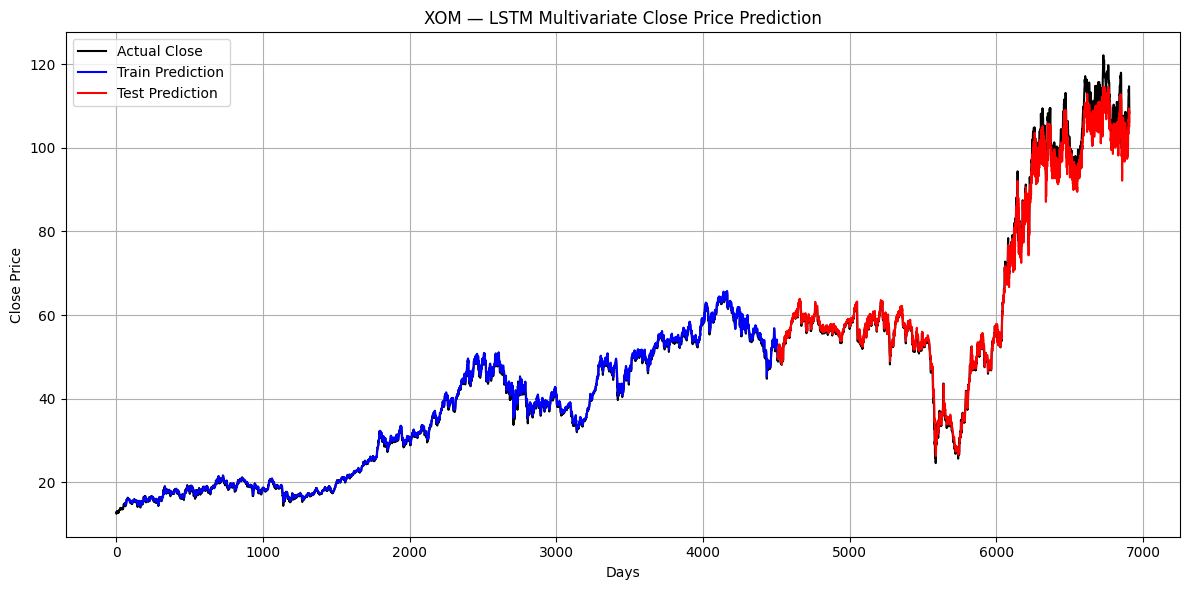

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(actual_close, label="Actual Close", color='black')
plt.plot(train_plot, label="Train Prediction", color='blue')
plt.plot(test_plot, label="Test Prediction", color='red')
plt.title(f"{symbol} — LSTM Multivariate Close Price Prediction")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Random Forest

In [ ]:
def create_features(df):
    df = df.copy()
    df['Close_lag_1'] = df['Close'].shift(1)
    df['Close_lag_3'] = df['Close'].shift(3)
    df['Close_lag_7'] = df['Close'].shift(7)
    df['Daily_Return'] = df['Close'].pct_change()
    df['Rolling_Mean_5'] = df['Close'].rolling(window=5).mean()
    df['Rolling_Std_5'] = df['Close'].rolling(window=5).std()
    df['Volatility_10'] = df['Close'].rolling(window=10).std()
    df['Volume_Change'] = df['Volume'].pct_change()
    return df.dropna()

In [ ]:
results = []
symbols = df['Symbol'].unique()

for symbol in symbols:
    print(f"\n📈 Training models for: {symbol}")

    stock_df = df[df['Symbol'] == symbol][['Open', 'High', 'Low', 'Close', 'Volume']].reset_index(drop=True)

    # Skip if not enough data
    if len(stock_df) < 100:
        print(f"⏭️ Skipping {symbol} — not enough data")
        continue



📈 Training models for: AAPL

📈 Training models for: ABBV

📈 Training models for: ADBE

📈 Training models for: AMD

📈 Training models for: AMGN

📈 Training models for: AMZN

📈 Training models for: BAC

📈 Training models for: C

📈 Training models for: COIN

📈 Training models for: COP

📈 Training models for: COST

📈 Training models for: CRM

📈 Training models for: CVS

📈 Training models for: CVX

📈 Training models for: EOG

📈 Training models for: GILD

📈 Training models for: GOOGL

📈 Training models for: GS

📈 Training models for: HAL

📈 Training models for: HD

📈 Training models for: INTC

📈 Training models for: JNJ

📈 Training models for: JPM

📈 Training models for: LOW

📈 Training models for: MCD

📈 Training models for: META

📈 Training models for: MPC

📈 Training models for: MRK

📈 Training models for: MS

📈 Training models for: MSFT

📈 Training models for: NFLX

📈 Training models for: NKE

📈 Training models for: NVDA

📈 Training models for: ORCL

📈 Training models for: PFE

📈 Traini

In [ ]:
stock_df = create_features(stock_df)

In [ ]:
features = [
            'Open', 'High', 'Low', 'Volume',
            'Close_lag_1', 'Close_lag_3', 'Close_lag_7',
            'Daily_Return', 'Rolling_Mean_5', 'Rolling_Std_5',
            'Volatility_10', 'Volume_Change'
        ]

In [ ]:
X = stock_df[features]
y = stock_df['Close']

<Axes: >

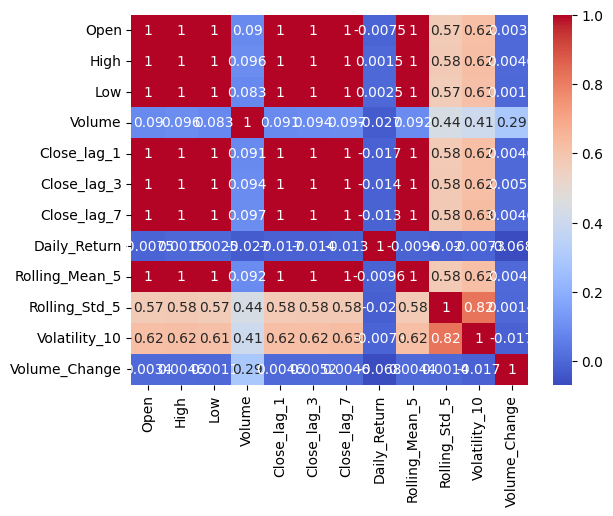

In [ ]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')

In [ ]:
split_idx = int(len(X) * 0.65)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf_param = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = RandomizedSearchCV(rf, rf_param, n_iter=10, cv=3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1, random_state=42)

In [ ]:
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_preds = best_rf.predict(X_test)

In [ ]:
mse_rf = mean_squared_error(y_test,rf_preds)
mse_rf

483.70435307211795

In [ ]:
rmse_rf = mse_rf**0.5
rmse_rf

21.99327972522784

In [ ]:
r2_rf = r2_score(y_test, rf_preds)
r2_rf

0.2298380537896194

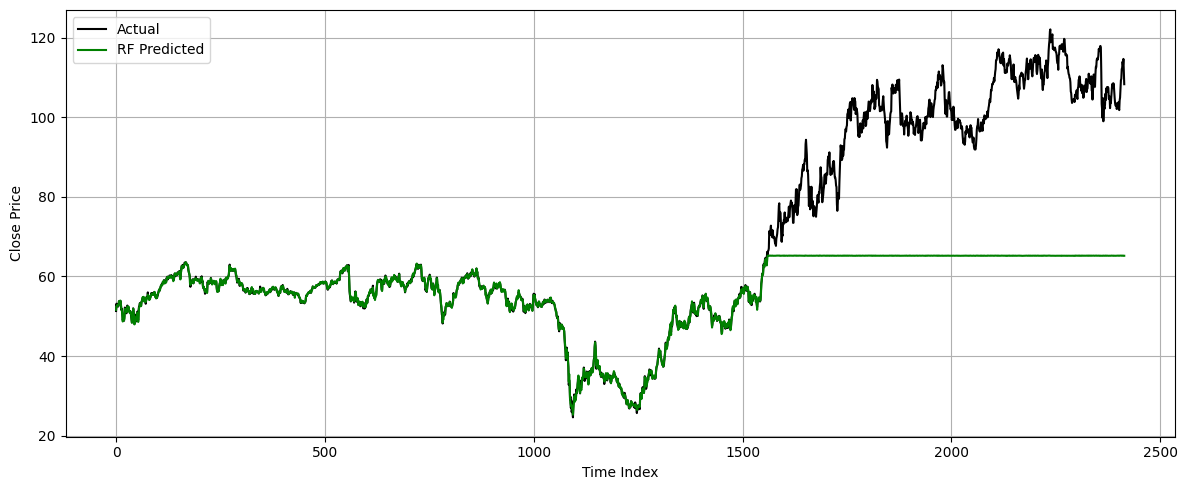

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(rf_preds, label='RF Predicted', color='green')
plt.xlabel("Time Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# XGBoost

In [ ]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_grid = RandomizedSearchCV(xgb, xgb_param, n_iter=10, cv=3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1, random_state=42)

In [ ]:
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
xgb_preds = best_xgb.predict(X_test)

In [ ]:
mse_xg = mean_squared_error(y_test,xgb_preds)
mse_xg

497.4496457695662

In [ ]:
rmse_xg = mse_xg**0.5
rmse_xg

22.303579214322667

In [ ]:
r2_xgb = r2_score(y_test, xgb_preds)
r2_xgb

0.20795257496797293

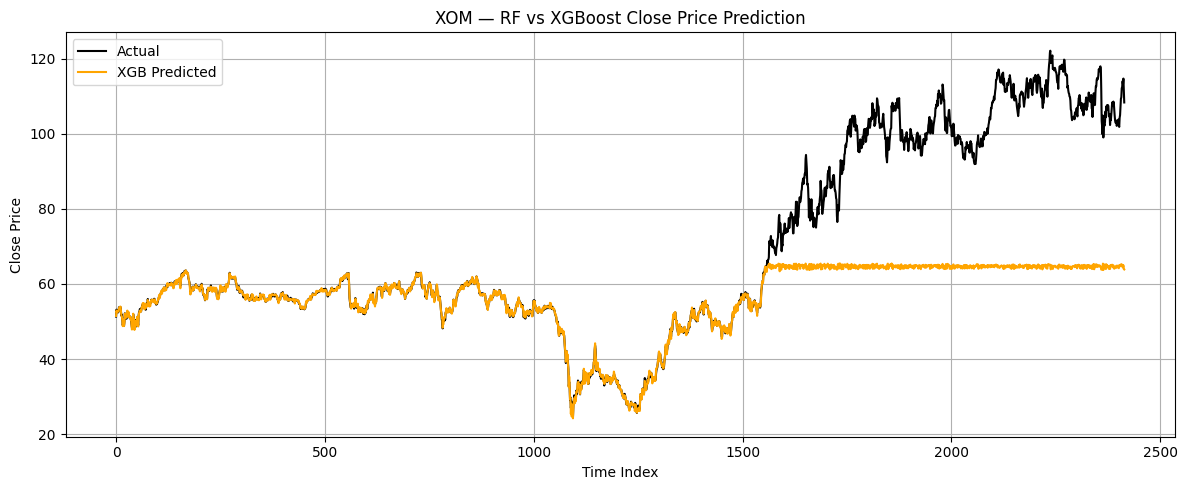

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(xgb_preds, label='XGB Predicted', color='orange')
plt.title(f"{symbol} — RF vs XGBoost Close Price Prediction")
plt.xlabel("Time Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
X_test.describe()

Open         High          Low        Volume  Close_lag_1  \
count  2415.000000  2415.000000  2415.000000  2.415000e+03  2415.000000   
mean     69.145381    69.821312    68.462900  1.777175e+07    69.124052   
std      25.059967    25.298114    24.825426  9.486766e+06    25.055899   
min      25.427145    25.560027    23.535548  3.851300e+06    24.582962   
25%      53.426032    53.961271    53.039082  1.127220e+07    53.438726   
50%      58.379523    58.748039    58.032048  1.524520e+07    58.410355   
75%      96.992238    97.962879    96.023245  2.116690e+07    96.965397   
max     122.004163   123.065912   121.624270  8.443940e+07   122.121056   

       Close_lag_3  Close_lag_7  Daily_Return  Rolling_Mean_5  Rolling_Std_5  \
count  2415.000000  2415.000000   2415.000000     2415.000000    2415.000000   
mean     69.074896    68.978958      0.000461       69.099313       0.933948   
std      25.027501    24.970070      0.017813       25.019348       0.702831   
min      24.582962    24.582962     -0.122248       26.135324       0.048038   
25%      53.438726    53.438726     -0.008310       53.480447       0.425073   
50%      58.398216    58.382076      0.000367       58.422370       0.749882   
75%      96.880337    96.785793      0.009174       97.066044       1.258179   
max     122.121056   122.121056      0.126868      120.293674       7.573273   

       Volatility_10  Volume_Change  
count    2415.000000    2415.000000  
mean        1.282556       0.049468  
std         0.907035       0.359447  
min         0.137891      -0.750697  
25%         0.611865      -0.158169  
50%         1.065816      -0.016294  
75%         1.714918       0.183102  
max         8.011703       4.262186